#<mark> BZKF Machine Learning Übung – Einführung </mark>

## Ziel der Übung
Sie modellieren eine **binäre Klassifikation** (gutartig vs. bösartig) mit **zwei Merkmalen die sie** aus dem *Breast Cancer Wisconsin (Diagnostic)*-Datensatz auswählen. Sie vergleichen einfache Algorithmen und optimieren deren **Hyperparameter**, um einen **hohen F1-Score**, welcher unsere Klassifikationsperformance wiedergibt, zu erreichen.

## Was Sie tun werden
- Initiales Sichten der Daten für **strategische Entscheidungen** zum Datenhandling
- Zwei **sinnvolle Features** auswählen, mit hohem potential für eine hohe Klassifikationsperformance.
- **Hyperparameter** der **Klassifikationsalgorithmen** so anpassen, dass der **F1-Score** auf den **Validierungsdaten** maximiert wird.
- Am Ende das **beste Modell** auf dem **Holdout-Testdatensatz** bewerten.
- Nach erfolgreichen Modelierungsversuchen können:

#### Nach erfolgreichen Modellierungsversuchen: Weitere Optionale Hyperparameter

1) **Datenhandling (Kapitel V)**  
   - **Datennormalisierung** ausschalten.
   - **Datenbalancierung** für ungleich verteilte Klassen ausschalten.

2) **Train/Validation/Test-Split variieren (Kapitel V & VI)**  
   - Anderen Split als **60 % / 20 % / 20 %** ausprobieren.  
   - **Stratifizierung deaktivieren**.

3) **Random-Seed variieren (Kapitel V)**  
   - Mit einem **anderen Seed** die Datensatz-Zusammenstellung und weitere **Zufallsprozesse** neu auswürfeln.  
   
---

## Wichtige Hinweise
- Voreingestellt sind "schlechte" Features und die Exremwerte der Hyperparameter.

Tipp:
- Die jeweiligen Kapitel konkretisieren ihre Aufgaben
- Probieren sie nur **wenige Hyperparameter** auf einmal, die ungefähren Laufzeiten sind an den entsprechenden Stellen angegeben.
- **Overfitting vermeiden:** Beziehen Sie die Leistung auf dem **Validierungset** mit ein; Sie müssen eine gute Leistung auf dem unbekannten **Testset** dem am Ende erreichen.
- Änderungen am Code nur an den **markierten Stellen**, **exakt nach** den gezeigten Beispielen. (Sie werden mit einem  🔴 #TODO:... ) aufgefordert

## Bewertung
- **Primäre Metrik:** **F1-Score** (Balance aus Präzision und Sensitivität).

---

## Mini-Glossar
- **Feature (Merkmal):** Messgröße/Variable, die einen Datenpunkt beschreibt (z. B. Radius, Textur).
- **Hyperparameter:** Modelleinstellungen (z. B. *k* bei k-NN, *C* bei SVM), die **vor** dem Training festgelegt werden.
- **Validierung:** Datenteil zur **Modellwahl**; Ergebnisse steuern Ihre Entscheidungen.
- **Holdout-Test:** Für die **finale** Beurteilung – wird erst ganz am Ende verwendet.
- **F1-Score:** Harmonisches Mittel aus **Precision** und **Recall**; hoch = gute Balance aus „richtig erkannt“ und „wenig übersehen“.




#I) <mark>Python Package Imports und Codeeinstellungen</mark>
Festlegen äußerer Formen des Notebooks

Alle restlichen Packages, werden zur Übersichtlichkeit in den jeweiligen Zellen importiert



In [20]:
#@title Click to Expand/Collapse

# Zelle 1: Imports & Settings
import warnings
import contextlib
import sys

from IPython.display import display, HTML
import pandas as pd
pd.set_option('display.max_columns', None)   # alle Spalten zeigen
pd.set_option('display.max_rows', None)      # alle Zeilen (Vorsicht bei großen DFs)
pd.set_option('display.width', None)         # keine Zeilenumbrüche
pd.set_option('display.max_colwidth', None)

display(HTML("""
<style>
.output_scroll {overflow-y: visible !important; max-height: none !important;}
</style>
"""))

# Flag: alle Boundary-Plots pro Hyperparameter-Kombi zeigen
# -> Zeigt sonst nur den Plot der besten Hyperparameter-Kombination
# -> Kapitel X)
PLOT_ALL_BOUNDARIES = True


#II) <mark>Daten Laden</mark>


In [21]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
#Lädt den 'breast_cancer'-Datensatz (durch das package scikit-learn)
#und extrahiert daraus die Datentabelle als pandas DataFrame (df)
b = load_breast_cancer(as_frame=True)
df = b.frame

# III) <mark>Initiale Sichtung der tabelarischen Daten</mark>

**Label-Definition**
- `target` (y): **0 = malignant (bösartig)** → *positive Klasse*
- `target` (y): **1 = benign (gutartig)** → *negative Klasse*

**Ziel dieses Schritts**
- Erste Orientierung am Datensatz durch Ansicht der Tabelle (Ausschnitt/Spaltenübersicht).
- Prüfen, ob die `target`-Kodierung der oben genannten Definition entspricht.
- Grober Blick auf offensichtliche Auffälligkeiten (z. B. fehlende oder unplausible Werte).

**Hinweis**
- Die Festlegung der **positiven Klasse = malignant (0)** bestimmt die Interpretation späterer Kennzahlen (z. B. Sensitivität/Recall bezieht sich auf „malignant“).



## III)-I) Kontrolle des Dataframes
Dataframes aus dem Pandas Package sind ähnlich zu Excel Sheets.
Sie haben Zeilen und Spalten, in unserem Fall die Patienten und respektive die Features + das Label.

Jede Zelle hält also ein Feature (z. B. Mean Radius) des jeweiligen Patienten (z. B. mit dem Index 512).

In [22]:
df.sample(5, random_state=0)  #Nur zufällige 5 Zeilen anzeigen, zum Platz sparen, reicht um ein erstes Gefühl zu bekommen
#df    #würde den vollständigen Dataframe/Datensatz anzeigen

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.58,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0.2142,0.6549,1.606,19.25,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,0.2300,0.6690,1.661,20.56,0.003169,0.013770,0.010790,0.005243,0.01103,0.001957,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1


In [23]:
df.info()             #Übersicht der Anzahl der Patienten,
                      #Column --> die Featurenamen,
                      #Non-Null Count --> Zellen die Nicht-Null sind (also nicht leer sind),
                      #Dtypen --> Datentypen, wichtig fürs Programmieren float64 = Gleitkommazahl mit hoher genauigkeit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [24]:
df.describe().T #gibt für jede Spalte/Feature eine einfache diskriptive Statistik aus

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [25]:
#Diskriptive Statistik der Features der bösartigen Tumorklasse
df[df["target"]==0].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,0.0
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,0.193800,0.362100,1.334000,13.990000,0.002667,0.008422,0.011010,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,0.0
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,0.390375,0.892825,2.715500,35.762500,0.005085,0.019662,0.026998,0.011415,0.014615,0.002688,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,0.0
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,0.547200,1.102500,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205,0.017700,0.003739,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,0.0
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,0.757300,1.429250,5.206250,94.000000,0.007971,0.038910,0.050443,0.017497,0.022132,0.004892,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,0.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,0.0


In [26]:
#Diskriptive Statistik der Features der gutartigen Tumorklasse
df[df["target"]==1].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.22038,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,1.0
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.58918,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,0.0
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,0.111500,0.36020,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,1.0
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,0.207300,0.79590,1.445000,15.260000,0.005212,0.011320,0.010990,0.006433,0.015600,0.002074,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,1.0
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,0.257500,1.10800,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061,0.019090,0.002808,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,1.0
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,0.341600,1.49200,2.388000,25.030000,0.008534,0.025890,0.030560,0.011870,0.024060,0.004174,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,1.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,0.881100,4.88500,5.118000,77.110000,0.021770,0.106400,0.396000,0.052790,0.061460,0.029840,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,1.0


## III)-II) Kontrolle der Klassenverteilung




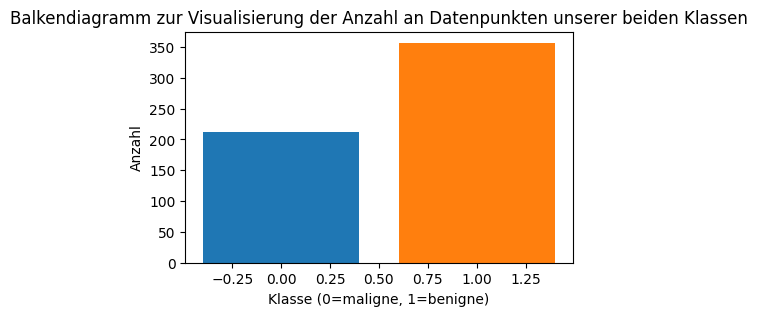

In [27]:
import matplotlib.pyplot as plt
# Balkendiagramm zur Visualisierung der Anzahl der jeweiligen Klassen
counts = df["target"].value_counts().reindex([0, 1])
plt.figure(figsize=(5,3))
plt.bar([0, 1], counts, color=["C0", "C1"])  # 0=orange, 1=blau
plt.xlabel("Klasse (0=maligne, 1=benigne)")
plt.ylabel("Anzahl")
plt.title("Balkendiagramm zur Visualisierung der Anzahl an Datenpunkten unserer beiden Klassen")
plt.show()

##III)-III) Dataframe in Features (X) und Labels (y) auftrennen

In [28]:
#@title Click to Expand/Collapse

def split_X_y_simple(df: pd.DataFrame, target_col: str = "target"):
    """Teilt df in X und y. y bleibt strikt 0/1 (als int)."""
    if target_col not in df.columns:
        raise ValueError(f"Spalte '{target_col}' nicht im DataFrame gefunden.")
    y = df[target_col].astype(int).copy()
    X = df.drop(columns=[target_col]).copy()
    return X, y

In [29]:
X, y = split_X_y_simple(df)

# Exkurs:
Die untere Zelle beinhaltet ein Wisconson-Breast-Cancer Klassifikations-Minimalbeispiel bei der eine SVM mit linearer Decision Boundary auf allen 30 Features erst auf einem Trainingsdatensatz gefitet und anschließend auf dem Testdatensatz evaluiert wird.

In [41]:
# Minimaler Klassifikations-Workflow mit linearer SVM
# Ziel: Einmal eine erfolgreiche Klassifikation sehen (Train/Test F1-Score).
# Dataset: Wisconsin Breast Cancer (569 Fälle, 30 Features, binäres Label --> gutartig/bösartig)

from sklearn.datasets import load_breast_cancer          # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.model_selection import train_test_split      # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.preprocessing import StandardScaler          # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.svm import SVC                               # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.metrics import f1_score                      # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


RANDOM_STATE = 5 # fester Seed für Reproduzierbarkeit

# 1) Daten laden
data = load_breast_cancer()
X, y = data.data, data.target  # y ist binär und als 0 und 1 Codiert --> 0=malignant, 1=benign

# 2) Train/Test-Split (80/20, stratifiziert)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# 3) Z-Scaling/Datennormalisierung (auf Train fitten, auf Test anwenden)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  #Berechnet Mittelwert und Standardabweichung des Trainingsdatensatzes und wendet dann mit diesen Werten Z-Scaling an
X_test = scaler.transform(X_test) #Wendet Z-Scaling auf dem Testdatensatz an mit der vom Trainingsdatensatz berechneten Mittelwert und Standardabweichung

# 4) Lineare SVM trainieren
clf = SVC(kernel="linear", random_state=RANDOM_STATE, C=1.0) #Komplexes Datenobject, welches die Hyperparameter und nach dem Training die Modelparameter speichert
clf.fit(X_train, y_train) #fit = training, hier werden die Modelparameter gelernt

# 5) Evaluation der Klassifikationsleistung mit F1-Score

y_pred_train = clf.predict(X_train) #nimmt die Datenpunkte und berechnet mit den Modelparametern die Schätzung y_dach
y_pred_test = clf.predict(X_test) #gleiches hier, nur mit dem testset

f1_train = f1_score(y_train, y_pred_train, pos_label=0)#Vergleicht den Output mit dem Label(Ground Truth)
f1_test  = f1_score(y_test, y_pred_test,  pos_label=0) #pos_label=0, setzt "malignant" als positive Klasse Fest

print("Train F1:", round(f1_train, 4))
print("Test  F1:", round(f1_test,  4))

Train F1: 0.9851
Test  F1: 0.9767


#IV) <mark>Einfache Datenvisualisierung</mark>


Erster visuelle Datensichtung: Histogramme & Boxplots (ohne Label)

**Ziel dieser Ansicht**
- Gefühl für die **Rohdaten** bekommen: typische Wertebereiche, Streuung, Form der Verteilungen.
- **Ausreißer** erkennen, ohne bereits zu bewerten.
- **Ohne Label** (target-blind): Es werden **keine Klassen** angezeigt.

**Was wird angezeigt**
- Pro Feature zwei Darstellungen:
  - **Histogramm (oben):** Häufigkeitsverteilung als Dichte.
  - **Boxplot (unten):** Median, Interquartilsabstand (IQR) und potenzielle Ausreißer (Punkte).

**Wie lesen / worauf achten**
- **Form der Verteilung:** symmetrisch vs. rechts/links schief, **ein- oder mehrgipflig**.
- **Streuung & Lage:** Breite/Enge der Balken, Position des Medians im Boxplot.
- **Ausreißer:** Punkte außerhalb der Whisker = **selten**, nicht automatisch „falsch“.
- **Skalenunterschiede:** Manche Features haben sehr kleine, andere sehr große Wertebereiche.
- **Lücken/Cluster:** Bereiche ohne Beobachtungen bzw. getrennte Häufungen.

**Was wir hier noch nicht tun**
- **Keine** Klassen-Overlays, **keine** Modelle, **keine** Decisionboundaries.
- **Keine** Entscheidungen – nur **Sichtung** und grobe Einordnung.

> Merksatz: Erst **sehen und notieren**, was auffällt (Schiefe, Ausreißer, sehr unterschiedliche Skalen). Maßnahmen wie Skalierung oder Transformation kommen später – hier geht es nur um den ersten Überblick.




In [31]:
#@title Click to Expand/Collapse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def plot_univariate_hist_box_and_stats(
    X,
    y=None,
    *,
    cols_per_fig=6,
    bins=30,
    density=True,
    show_outliers=True,
    pos_label=0,
    C_no_reg=1e6,
    random_state=0,
    target_blind=False,
    class_names=None,
    balance=True,
    X_val=None,
    y_val=None
):
    """
    Zeichnet für jedes Feature zwei Diagramme:
      (oben) Histogramm der Werteverteilung, (unten) Boxplot.

    Betriebsarten
    -------------
    - target_blind=True:
        * y/Labels werden vollständig ignoriert.
        * Es gibt KEINE Klassen-Overlays, KEIN Modell, KEINE F1-Werte oder Schwellen.
        * Ziel: Erste Sichtung der Rohverteilungen und potenzieller Ausreißer.
    - target_blind=False:
        * y wird genutzt. Für jedes einzelne Feature wird eine 1D-Logistische-Regression
          (mit Standardisierung) trainiert.
        * Es werden F1-Scores auf Train (und optional Validation) und eine 0.5-Schwelle
          (zurücktransformiert auf Originalskala) angezeigt.
        * Zusätzlich werden Histogramme getrennt nach Klassen geplottet.

    Parameter
    ---------
    X : pd.DataFrame oder array-artig
        Merkmalsmatrix. Falls kein DataFrame, wird intern in einen DataFrame
        umgewandelt (Spaltennamen werden beibehalten, wenn vorhanden).
    y : array-artig, optional
        Zielvariable (nur relevant, wenn target_blind=False).
    cols_per_fig : int
        Anzahl Features, die nebeneinander je Abbildung gezeichnet werden.
    bins : int
        Anzahl Bins im Histogramm (Steuerung der Balkenfeinheit).
    density : bool
        True = Dichte (Fläche ~ 1), False = absolute Häufigkeiten.
    show_outliers : bool
        Ausreißerpunkte in Boxplots anzeigen (True) oder unterdrücken (False).
    pos_label : int/str
        Kodierung der positiven Klasse (für Logit, nur target_blind=False).
    C_no_reg : float
        Inverse Regularisierungsstärke der Logit; großer Wert ~ nahezu ohne Regularisierung.
    random_state : int
        Zufallssamen für die Logit (Reproduzierbarkeit, nur target_blind=False).
    target_blind : bool
        Wenn True, wird y ignoriert und es erfolgen reine Verteilungsplots.
    class_names : list[str] | None
        Anzeigenamen der negativen/positiven Klasse (nur target_blind=False).
    balance : bool
        Ob class_weight='balanced' in der Logit genutzt wird (nur target_blind=False).
    X_val, y_val : optional
        Optionaler Validationssatz; falls vorhanden, wird F1(val) zusätzlich berechnet.

    Rückgabe
    --------
    None
        Es werden Figuren mit Histogrammen/Boxplots angezeigt (Paging über Spaltenblöcke).

    Hinweise
    --------
    - Die Funktion paginiert automatisch durch die Featureliste (Blöcke zu 'cols_per_fig').
    - Schwellenlinie (nur target_blind=False) entspricht p=0.5 der Logit-Ausgabe,
      zurückgerechnet auf die Originalskala des jeweiligen Features.
    """

    # --- Sicherstellen, dass wir mit einem DataFrame arbeiten (Namen/Anzahl der Spalten) ---
    if not isinstance(X, pd.DataFrame):
        # Spaltennamen übernehmen, wenn im Input vorhanden; sonst Standardnamen
        X = pd.DataFrame(X, columns=getattr(X, "columns", None))

    n_features = X.shape[1]
    feature_names = X.columns.tolist()

    # --- Vorbereitung für die Klassentrennung / Logit (nur wenn Labels genutzt werden) ---
    if not target_blind:
        if y is None:
            raise ValueError("y muss übergeben werden, wenn target_blind=False.")
        y = np.asarray(y)
        # y_pos: 1 für positive Klasse, 0 sonst
        y_pos = (y == pos_label).astype(int)

        # Anzeigenamen der Klassen setzen/prüfen
        if class_names is None:
            class_names = [f"neg (≠{pos_label})", f"pos ({pos_label})"]
        elif len(class_names) != 2:
            raise ValueError("class_names muss eine Liste der Länge 2 sein.")

        # Masken für Klassenseparation (nur für Plots, nicht fürs Training)
        mask_neg = (y_pos == 0)
        mask_pos = (y_pos == 1)

        # Optionaler Validationssatz (wird nur ausgewertet, nicht gefittet)
        use_val = (X_val is not None) and (y_val is not None)
        if use_val:
            if not isinstance(X_val, pd.DataFrame):
                X_val = pd.DataFrame(X_val, columns=getattr(X_val, "columns", None) or feature_names)
            y_val = np.asarray(y_val)
            y_val_pos = (y_val == pos_label).astype(int)

    # --- Durch die Features in Blöcken iterieren (Paging) ---
    for start in range(0, n_features, cols_per_fig):
        cols = feature_names[start:start+cols_per_fig]
        ncols = len(cols)

        # 2 Zeilen: (0,*) Histogramme | (1,*) Boxplots
        fig, axes = plt.subplots(
            2, ncols, figsize=(3.6*ncols, 7.6),
            gridspec_kw={'height_ratios': [1.7, 1.3]}
        )

        # Für den 1-Spalten-Fall 'axes' in konsistente Form bringen
        if ncols == 1:
            axes = np.array(axes).reshape(2, 1)

        # --- Pro Feature: Histogramm (oben) + Boxplot (unten) ---
        for j, feat in enumerate(cols):
            x = X[feat].to_numpy()

            # (1) HISTOGRAMM
            axh = axes[0, j]
            # Einheitliche Bins, stabil gegenüber Ausreißern
            edges = np.histogram_bin_edges(x, bins=bins)

            if target_blind:
                # Reine Verteilung (ohne Labels)
                axh.hist(x, bins=edges, alpha=0.85, density=density)
                axh.set_title(f"{feat}")
            else:
                # Klassengetrennte Verteilungen (nur wenn y genutzt wird)
                x0, x1 = x[mask_neg], x[mask_pos]

                # --- 1D-Logistische Regression NUR für Score/Schwelle ---
                scaler = StandardScaler()
                xf = scaler.fit_transform(x.reshape(-1, 1))

                lr = LogisticRegression(
                    C=C_no_reg,
                    solver="lbfgs",
                    max_iter=1000,
                    random_state=random_state,
                    class_weight=('balanced' if balance else None)
                )
                lr.fit(xf, y_pos)

                # F1 auf Trainingsdaten (Schwelle 0.5 auf p(Positiv))
                proba_tr = lr.predict_proba(xf)[:, 1]
                y_pred_tr = (proba_tr >= 0.5).astype(int)
                f1_tr = f1_score(y_pos, y_pred_tr)

                # Schwelle (p=0.5) zurück auf Originalskala bringen
                coef = lr.coef_[0, 0]
                intercept = lr.intercept_[0]
                if abs(coef) > 1e-12:
                    s_thresh = -intercept / coef                  # Schwelle in z-Skala
                    x_thresh = scaler.mean_[0] + s_thresh * scaler.scale_[0]  # zurückskalieren
                else:
                    x_thresh = np.nan  # nahezu flache Logit → keine sinnvolle Schwelle

                # Optional: F1 auf Validation (gleiches Modell, gleicher Scaler)
                f1_va = None
                if not target_blind and 'use_val' in locals() and use_val:
                    xv = X_val[feat].to_numpy().reshape(-1, 1)
                    xv_s = scaler.transform(xv)
                    proba_va = lr.predict_proba(xv_s)[:, 1]
                    y_pred_va = (proba_va >= 0.5).astype(int)
                    f1_va = f1_score(y_val_pos, y_pred_va)

                # Klassen-Histogramme zeichnen
                axh.hist(x0, bins=edges, alpha=0.6, density=density, label=class_names[0])
                axh.hist(x1, bins=edges, alpha=0.6, density=density, label=class_names[1])

                # Schwelle einzeichnen (falls berechenbar)
                if np.isfinite(x_thresh):
                    axh.axvline(x_thresh, linestyle="--")

                # Titeltext mit Scores/Schwelle
                if f1_va is None:
                    axh.set_title(
                        f"{feat}\nF1(tr)={f1_tr:.3f}"
                        + (f" | Schwelle={x_thresh:.3f}" if np.isfinite(x_thresh) else "")
                    )
                else:
                    axh.set_title(
                        f"{feat}\nF1(train)={f1_tr:.3f} | F1(val)={f1_va:.3f}"
                        + (f"\nSchwelle={x_thresh:.3f}" if np.isfinite(x_thresh) else "")
                    )

                if j == 0:
                    axh.legend()

            axh.set_xlabel("")                               # x-Label weglassen (kompakter)
            axh.set_ylabel("Dichte" if density else "Anzahl")# y-Label je nach Modus

            # (2) BOXPLOT
            axb = axes[1, j]
            if target_blind:
                # Eine Box: Gesamtverteilung (ohne Klassentrennung)
                axb.boxplot(x, showfliers=show_outliers)
                axb.set_xticklabels(["gesamt"])
            else:
                # Zwei Boxen: nach Klassen getrennt
                axb.boxplot(
                    [x[mask_neg], x[mask_pos]],
                    tick_labels=[class_names[0], class_names[1]],
                    showfliers=show_outliers
                )

            axb.set_xlabel("")   # x-Label weglassen
            axb.set_ylabel("")   # y-Label weglassen (Lesbarkeit im Raster)

        # Kompaktes Layout + Gesamtüberschrift je Block
        plt.tight_layout()
        fig.suptitle(
            f"Features {start+1}–{start+ncols} von {n_features}"
            + (" (target-blind)" if target_blind else ""),
            y=1.02
        )
        plt.show()





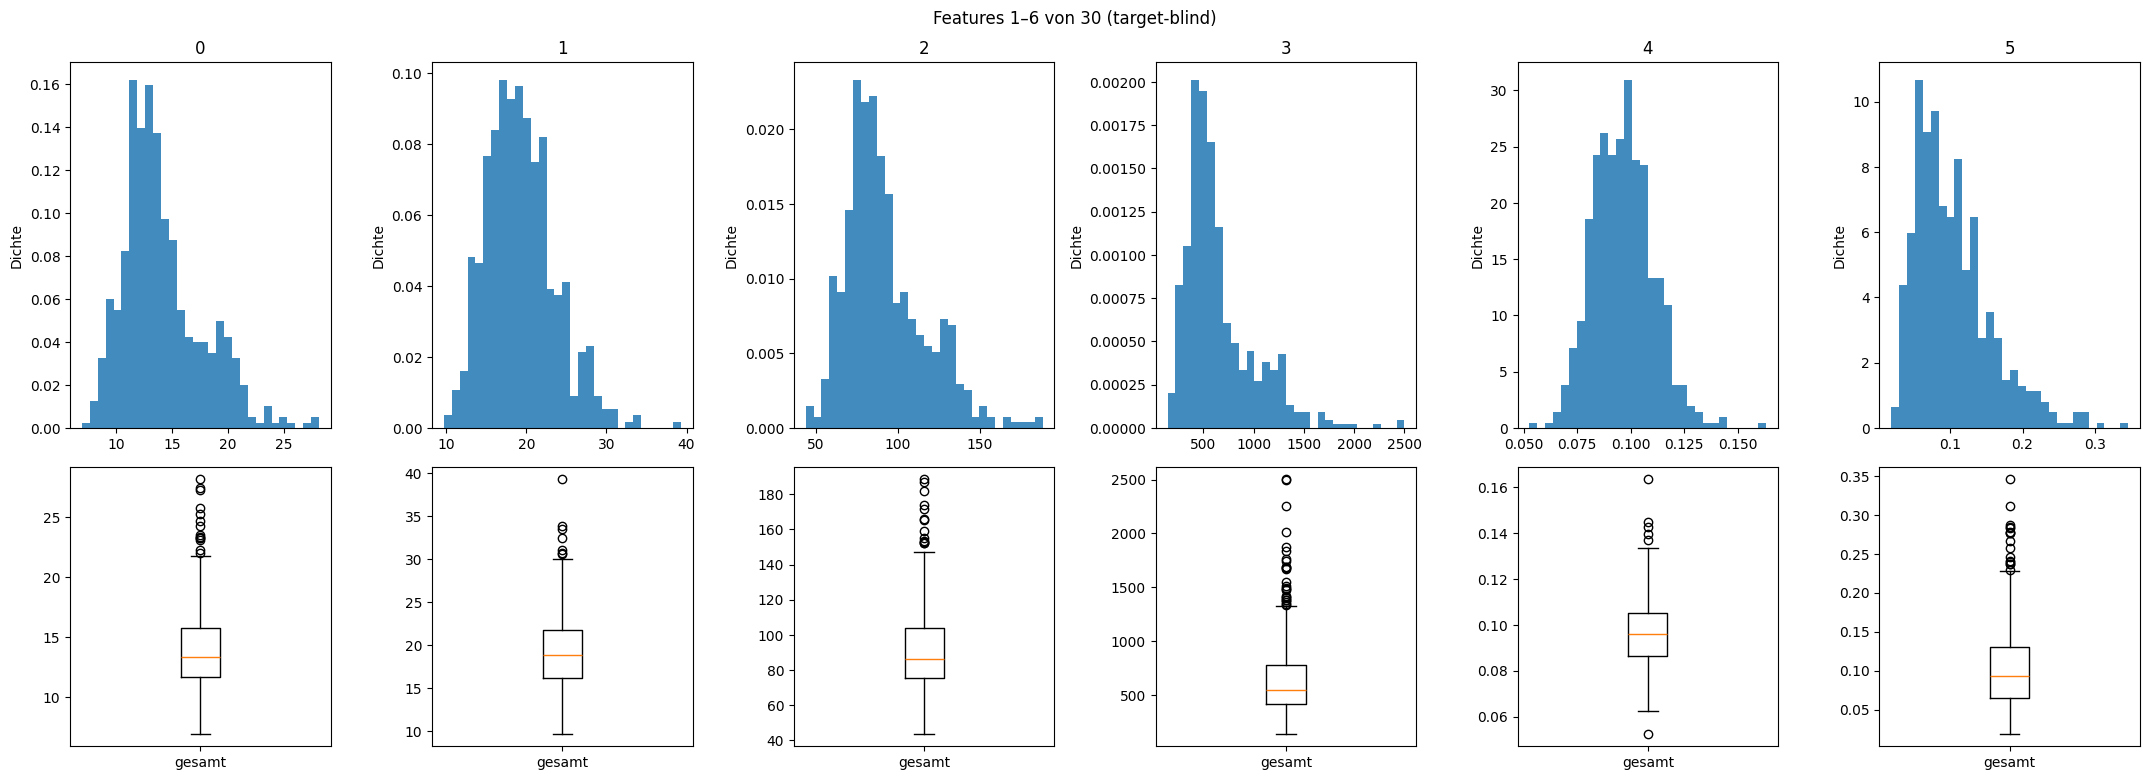

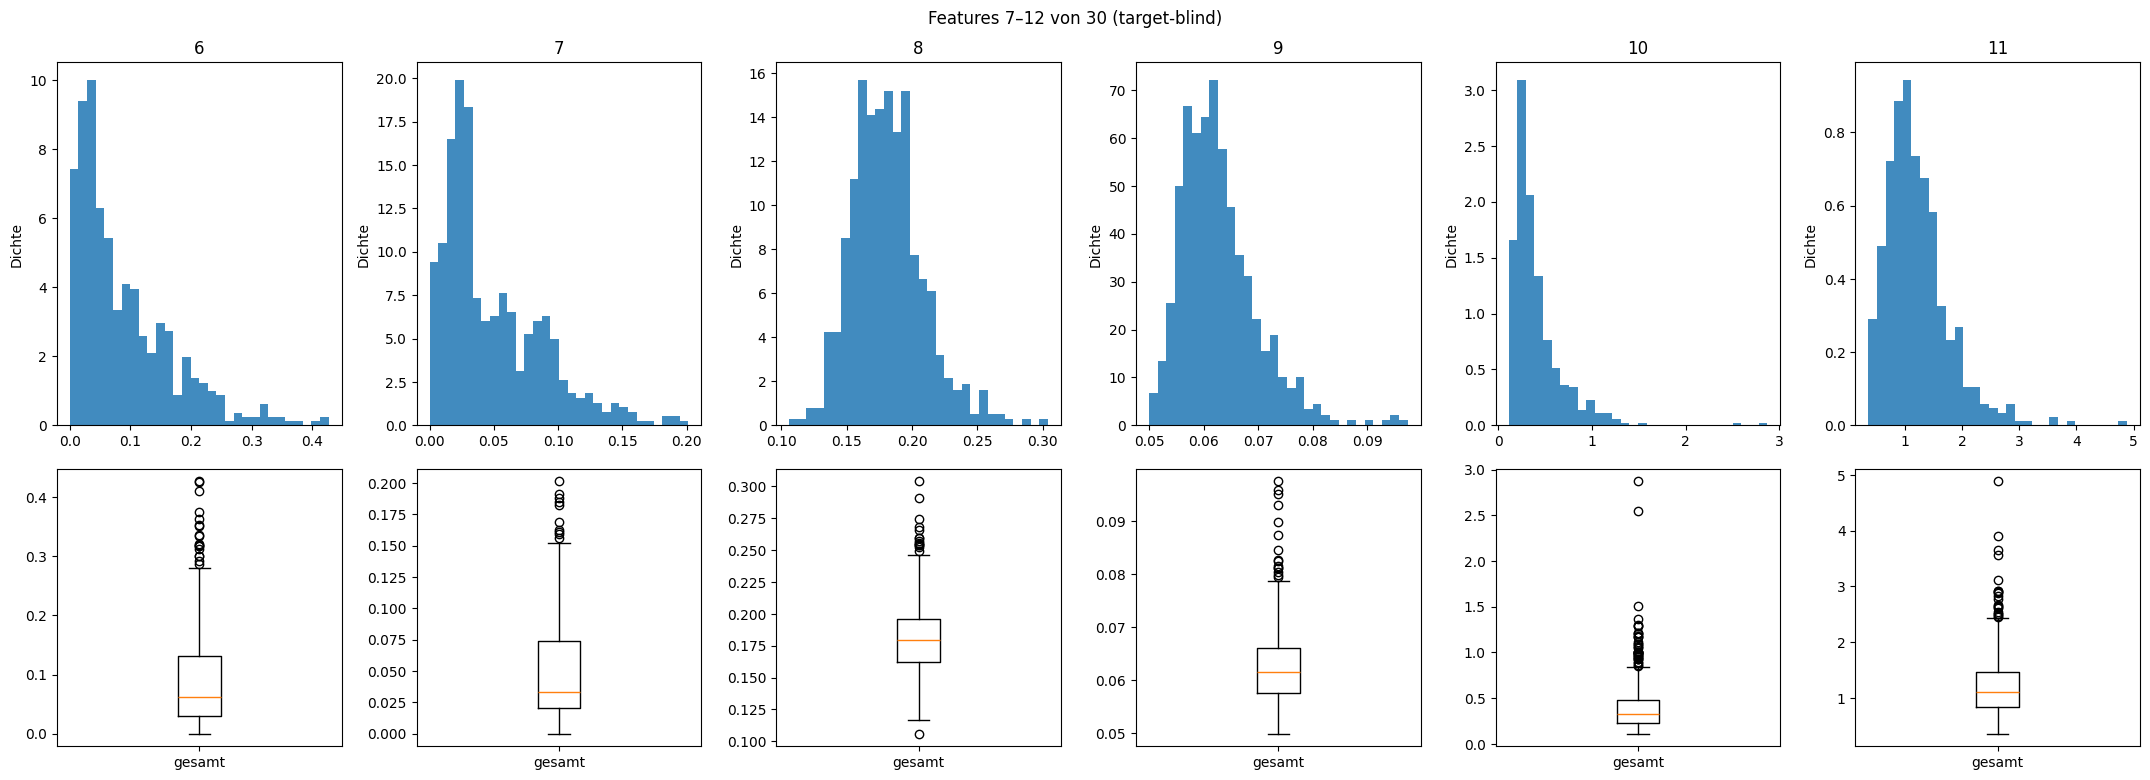

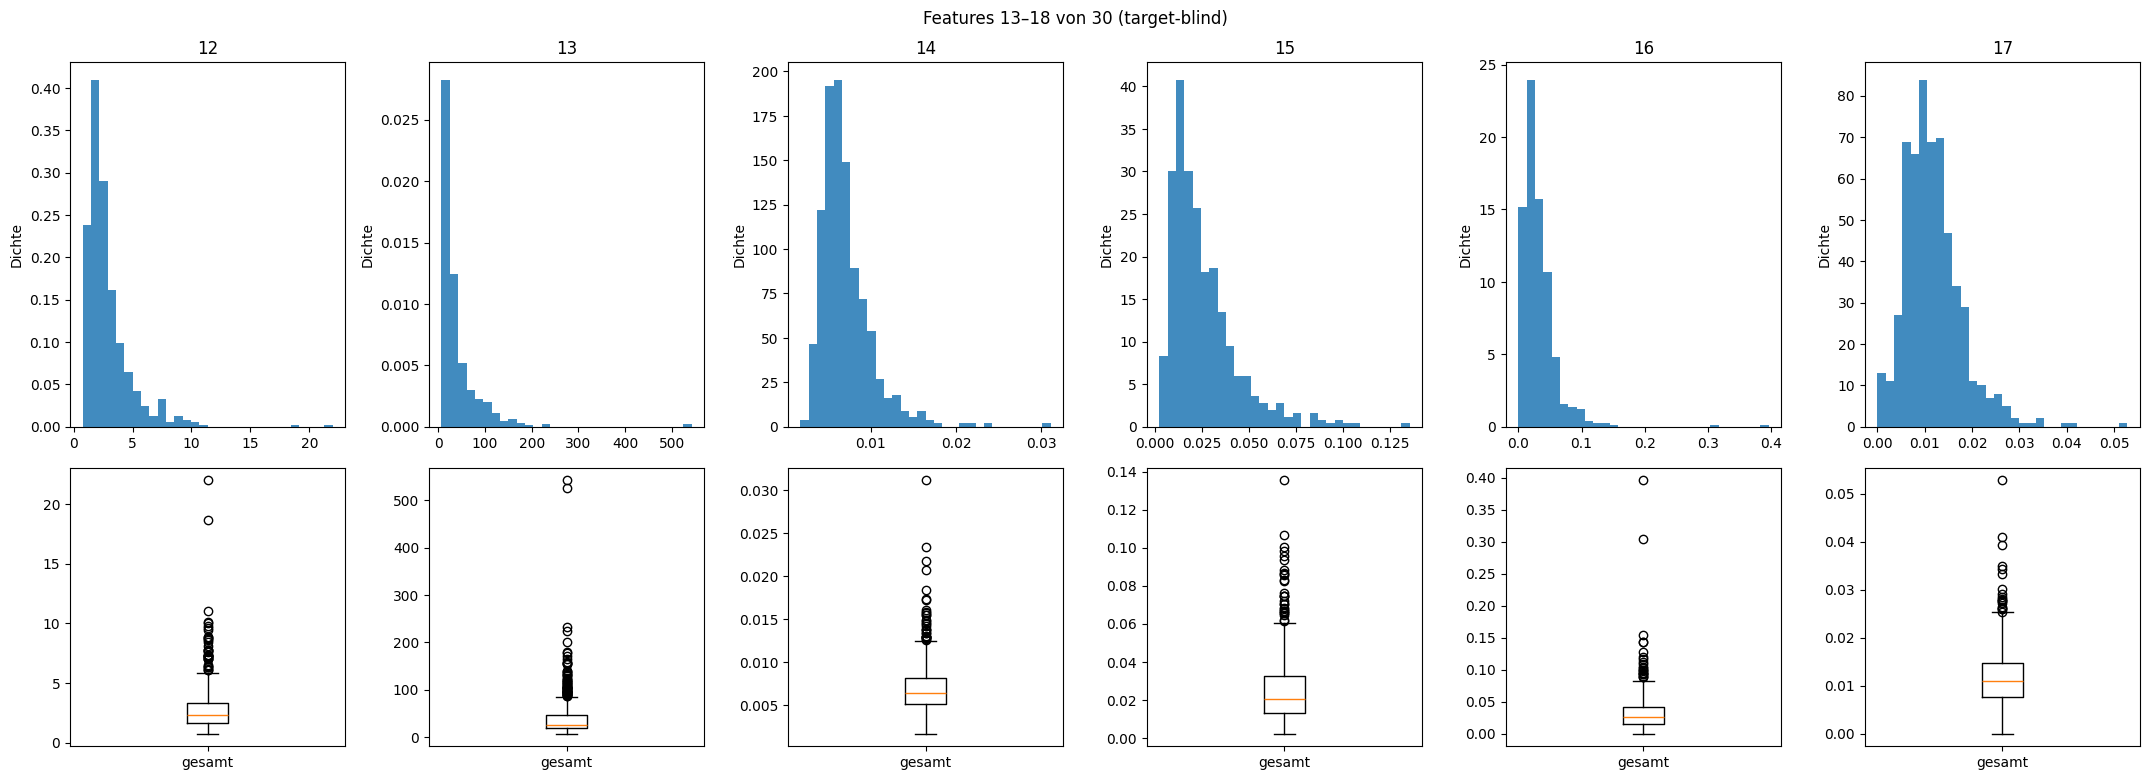

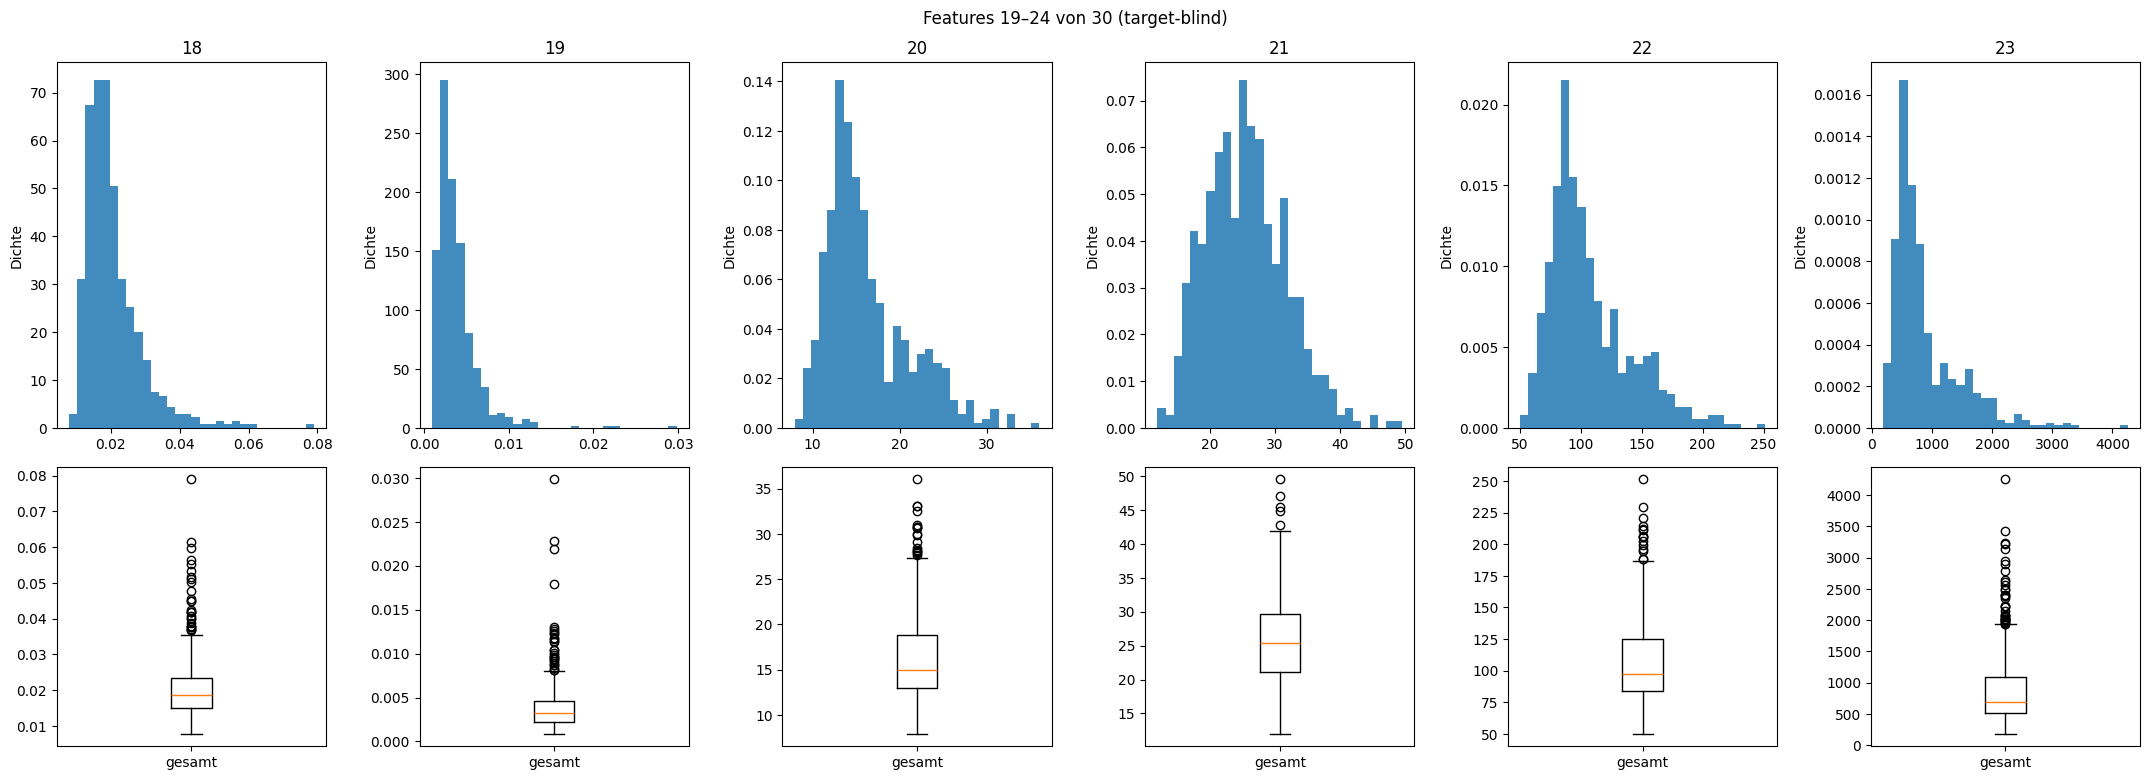

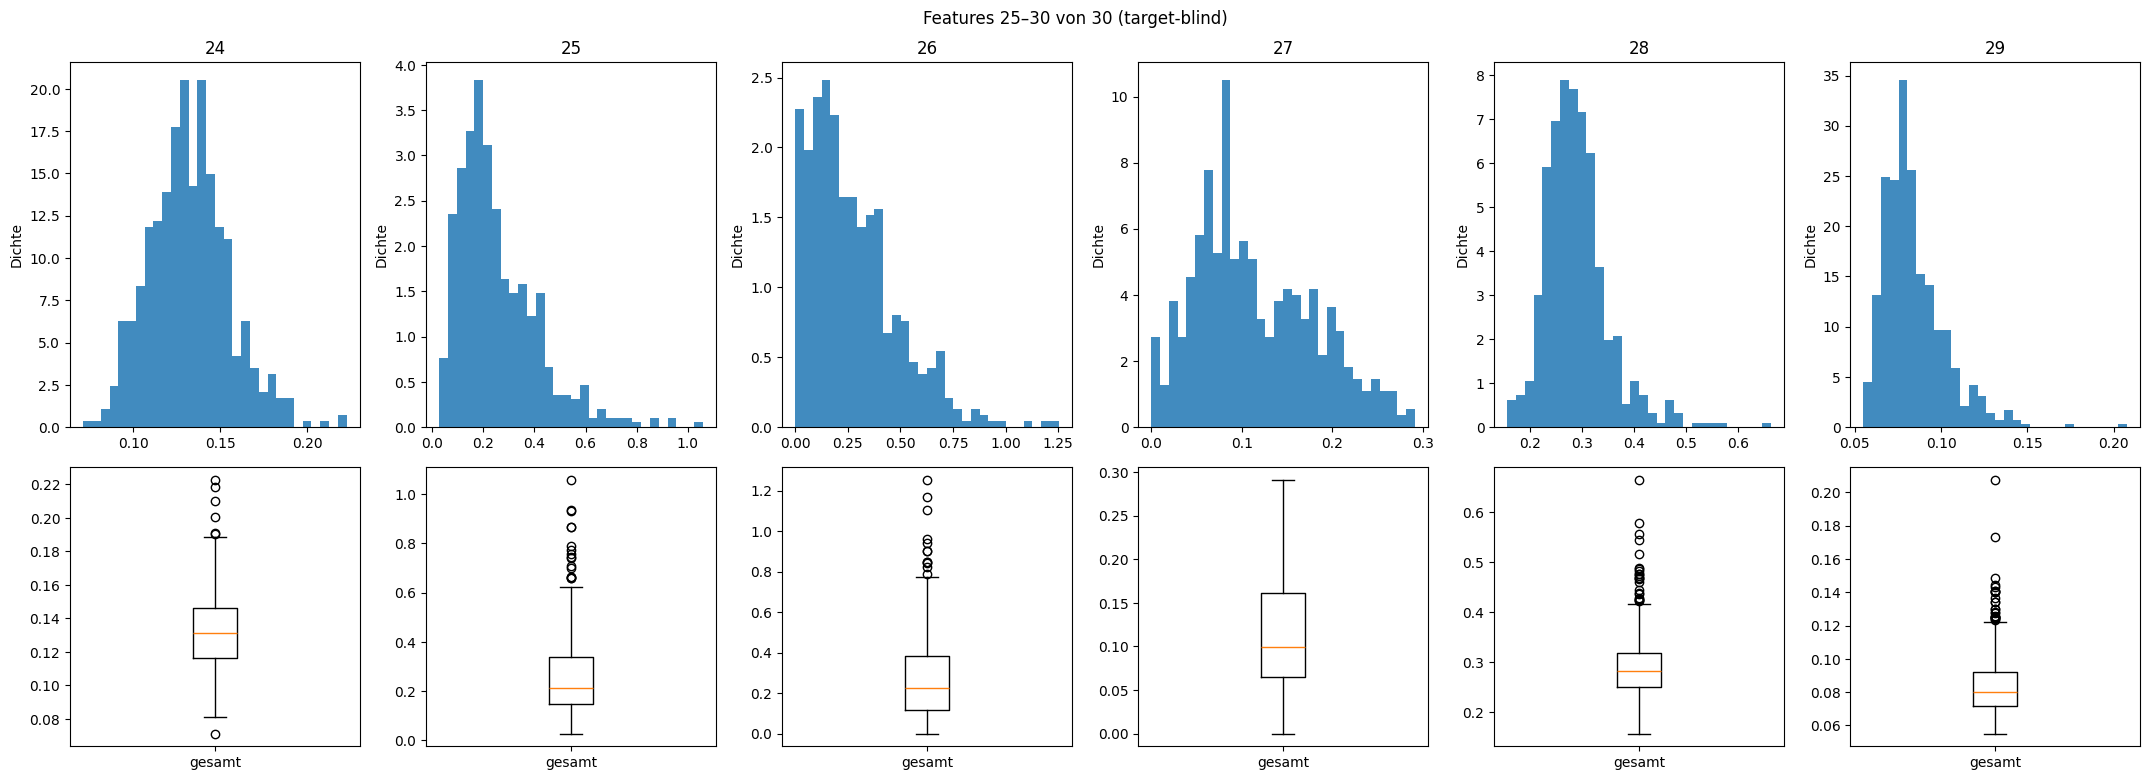

In [32]:
plot_univariate_hist_box_and_stats(X, target_blind=True)

##Datenbereinigung
Daten bereinigen wir heute nicht, da wir bei einem Benchmarkdatensatz annehmen, das wir nur legitime Ausreißer haben

🔴 TODO: Diskutieren Sie in Ihrer Gruppe
**Frage:** Welche Fehler/Verzerrungen riskieren wir, wenn wir bei einigen **Features** eine Ausreißerfilterung durchführen und alle Punkte mit **Z-Score > 3** entfernen (target-blind)?

**Denkanstöße (kurz)**
- **Normalverteilungsannahme:** Die 3-σ-Regel setzt (annähernd) Normalverteilung voraus; bei **schiefen/heavy-tail**-Verteilungen werden informative Extreme fälschlich entfernt.
- **Univariat vs. multivariat:** Ein Wert kann univariat extrem wirken, **multivariat** aber konsistent sein → Risiko, sinnvolle Fälle zu löschen.

# V) <mark>Globale/Datenhandling Hyperparameter</mark>

Die nachfolgenden globalen Hyperparamter stellen strategische Entscheidungen dar, welche man nach einer intialen Datensichtung festlegen muss.  

Implementiert wurden diese als Boolsche-Schalter, wobei "True" für "Ein" und "False" für "Aus" steht.

Festgelegt wurden die korrekten Optionen, mit Begründung.

1) `BALANCING_ON` (Gesetzt auf **True** oder False als Alternative)  
   - Die gesehene **Klassenverteilung** in **Kapitel III)-II)**, zeigt eine Klassendisbalance von ~37% malign zu ~63% benign Tumoren.

2) `normalize_data_after_split` (Gesetzt auf **True** oder False als Alternative)  
   - In **Kapitel IV** sieht man, dass die Features verschiedene Werteskalen aufweisen.
   - Dies hat vorallem Auswirkungen auf die Distanzberechnung zwischen Datenpunkten des **KNN-Klassifikators** und beschleunigt die Trainingprozesse des **SVM Lin/Rbf-Klassifikators** in **Kapitel X)**

3) `stratify_split` (Gesetzt auf **True** oder False als Alternative)   
   - Wahrt das Klassenverhältnis ~37% malign zu ~63% benign Tumoren bei der Aufteilung in Trainings-/Validations- und Testdatenset


4) `RANDOM_STATE` (Ganzzahl)  
   - Random-Seed, also eine Ganzzahl als Basis aller Zufallsprozesse.
   - Eine Änderung hat Auswirkungen auf alle Zufallsprozesse
   (z. B. welche Datenpunkte im Trainings-/Validations- und Testset landen)

🔴 TODO: Zunächst nichts.

Aber Optional:

Sie können die Schalter in nachfolgenden Durchläufen von True auf False ändern um die vermeindlich negativen Auswirkungen zu testen.

Ändern Sie **immer nur einen Schalter** gleichzeitig, um Effekte vergleichen zu können.


In [33]:
BALANCING_ON = True #🔴TODO: Oder False (z.b. BALANCING_ON = False)  --> Berücksichtigung der Klassendisbalance ein/aus
normalize_data_after_split = True #🔴TODO: oder False --> Normalisierung der Daten mit Z-Scoring ein/aus
stratify_split = False #🔴 TODO: Einstellen, ob das Klassenverhältniss beim Aufteilen in Train-/Val-/Testset gewahrt wird.
RANDOM_STATE = 42 #🔴TODO: Seed(Ganzzahl) für Zufallszahlen/-Prozesse. Änderung sorgt für anderen Train/Val/Test Split, neue Startwerte für die Decision Boundary der iterativen Klassifikationsalgorithmen usw.


# VI) <mark>Train/Validation/Test Split</mark>

**Was wird hier getan**
- Der vollständige Datensatz wird in **Train (60 %)**, **Validation (20 %)** und **Test (20 %)** aufgeteilt.
- Die **Klassenverhältnisse** bleiben in allen Splits erhalten (stratifiziert).
- **Test** bleibt unberührt bis zum Schluss (nur einmalige Endbewertung).
- (Optional) **Z-Scoring nach dem Split**: Skalierung wird nur auf dem **Train**-Teil gelernt und auf **Val/Test** angewendet (`normalize_data_after_split`).
- **Reproduzierbarkeit**: fester Seed (`RANDOM_STATE`) für vergleichbare Splits.

**Output zur Orientierung**
- Formate/Größen der drei Splits.
- Klassenverteilungen je Split (absolut und in %).

🔴TODO: Die Datensetaufteilung und die Stratifizierung kann in nachfolgenden Durchläufen gerne geändert werden

In [34]:
#@title Click to Expand/Collapse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Helferfunktion
def counts(y_arr):
    """
    Zählt Klassenhäufigkeiten in y und gibt ein {klasse: anzahl}-Dict zurück.
    - Sortiert nach Klassen-ID (Index).
    - Cast auf int für saubere, druckbare Werte/Keys.
    """
    s = pd.Series(y_arr)
    return {int(k): int(v) for k, v in s.value_counts().sort_index().items()}

# Helferfunktion
def to_pct(counts_dict):
    """
    Wandelt Klassenhäufigkeiten in Prozent um.
    Return: {klasse: prozent_auf_2_nachkommastellen}
    """
    total = sum(counts_dict.values())
    return {k: round(v / total * 100, 2) for k, v in counts_dict.items()}

def split_train_val_test(
    X, y,
    *,
    test_frac=0.20,                 # Anteil TEST bezogen auf den GESAMT-Datensatz (z. B. 0.2)
    val_frac=0.20,                  # Anteil VAL  bezogen auf den GESAMT-Datensatz (z. B. 0.2)
    random_state=RANDOM_STATE,      # globaler Seed für Reproduzierbarkeit
    normalize=True,                 # z-Score-Normalisierung an/aus (nach dem Split)
    stratify_split=True             # stratifizierte Splits ja/nein
):
    """
    Teilt X, y in Train/Val/Test anhand **globaler Anteile** (z. B. 0.6/0.2/0.2):
      - test_frac: Anteil Test (bezogen auf Gesamt)
      - val_frac : Anteil Val  (bezogen auf Gesamt)
      - Train ergibt sich zu 1 - test_frac - val_frac

    Optionen:
      - stratify_split=True  → erhält Klassenverhältnisse in allen Splits (empfohlen)
      - normalize=True       → StandardScaler nach dem Split: Fit auf Train, Transform auf Train/Val/Test
      - random_state         → nutzt den globalen RANDOM_STATE für reproduzierbare Splits

    Rückgabe:
      X_train, X_val, X_test, y_train, y_val, y_test
      (zusätzlich werden Shapes und Klassenverteilungen ausgegeben)
    """
    # --- Eingaben prüfen: Anteile müssen sinnvoll sein ---
    if not (0 < test_frac < 1) or not (0 < val_frac < 1):
        raise ValueError("test_frac und val_frac müssen in (0, 1) liegen.")
    if test_frac + val_frac >= 1:
        raise ValueError("test_frac + val_frac muss < 1 sein (es muss noch Train-Anteil übrig bleiben).")

    # Innere Val-Quote relativ zum verbleibenden TrainVal-Block (für 2. Split)
    # Bsp.: test_frac=0.2, val_frac=0.2 → verbleibend=0.8 → val_inner=0.2/0.8=0.25
    val_inner = val_frac / (1.0 - test_frac)

    # Stratifizierungs-Label setzen (oder None, wenn ohne Stratifizierung gesplittet werden soll)
    stratify_tr = y if stratify_split else None

    # --- 1) Test-Set abspalten (globaler Anteil test_frac) ---
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y,
        test_size=test_frac,
        random_state=random_state,
        stratify=stratify_tr
    )

    # --- 2) Aus dem TrainVal-Block: Val abspalten (so dass absolut val_frac entsteht) ---
    stratify_va = y_trainval if stratify_split else None
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval,
        test_size=val_inner,              # ergibt absolut ≈ val_frac
        random_state=random_state,
        stratify=stratify_va
    )

    # --- (Optional) z-Score-Normalisierung: Fit NUR auf Train, dann Transform auf alle Splits ---
    if normalize:
        scaler = StandardScaler()
        is_df = isinstance(X_train, pd.DataFrame)
        cols = X_train.columns if is_df else None

        # Fit auf Train (keine Leakage)
        scaler.fit(X_train.values if is_df else X_train)

        # Transformiere Train/Val/Test mit demselben Scaler
        X_train_scaled = scaler.transform(X_train.values if is_df else X_train)
        X_val_scaled   = scaler.transform(X_val.values   if is_df else X_val)
        X_test_scaled  = scaler.transform(X_test.values  if is_df else X_test)

        # Form (DataFrame vs. ndarray) erhalten
        if is_df:
            X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=cols)
            X_val   = pd.DataFrame(X_val_scaled,   index=X_val.index,   columns=cols)
            X_test  = pd.DataFrame(X_test_scaled,  index=X_test.index,  columns=cols)
        else:
            X_train, X_val, X_test = X_train_scaled, X_val_scaled, X_test_scaled

    # --- Reporting: Shapes & Klassenverteilungen (absolut & %) ---
    c_train = counts(y_train)
    c_val   = counts(y_val)
    c_test  = counts(y_test)

    print("Patienten zu Features:")
    print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
    print("\n")
    print("Klassenverhältniss: 0 = malignant & 1 = benign")
    print("\n")
    print("y_train-Klassen:", c_train)
    print("y_val-Klassen:", c_val)
    print("y_test-Klassen:", c_test)
    print("\n")
    print("y_train-%:", to_pct(c_train))
    print("y_val-%:", to_pct(c_val))
    print("y_test-%:", to_pct(c_test))

    return X_train, X_val, X_test, y_train, y_val, y_test


In [35]:
X_train_30D, X_val_30D, X_test_30D, y_train, y_val, y_test = split_train_val_test(
    X, y,
    test_frac=0.20,                         # 20 % Test (globaler Anteil)       🔴TODO: Kann in nachfolgenden Runden gerne Angepasst werden
    val_frac=0.20,                          # 20 % Validation (globaler Anteil) 🔴TODO: Kann in nachfolgenden Runden gerne Angepasst werden
    random_state=RANDOM_STATE,              # global
    normalize=normalize_data_after_split,   # global
    stratify_split=stratify_split           # Entscheidung: stratifizieren ja/nein (True/False)<--Klassenverhältniss beim splitten wahren  🔴TODO: Kann in nachfolgenden Runden gerne Angepasst werden, siehe Kapitel V
    )



Patienten zu Features:
Train: (341, 30) Val: (114, 30) Test: (114, 30)


Klassenverhältniss: 0 = malignant & 1 = benign


y_train-Klassen: {0: 125, 1: 216}
y_val-Klassen: {0: 44, 1: 70}
y_test-Klassen: {0: 43, 1: 71}


y_train-%: {0: 36.66, 1: 63.34}
y_val-%: {0: 38.6, 1: 61.4}
y_test-%: {0: 37.72, 1: 62.28}


# VII) <mark>Univariate Analyse</mark>

**Ziel**
- Ersteinschätzung des **Klassifikationspotenzials** einzelner Features.

**Was Sie sehen**
- Pro Feature:
  - **Histogramme** nach Klassen (malignant=0, benign=1).
  - **Boxplots** je Klasse.
  - **Einfache 1D-Klassifikation**: Wir betrachten jedes einzelne Feature getrennt und lassen ein **lineares Klassifikationsmodell** (logistische Regression) eine Decision Boundary finden.  
  - **Decision Boundary**: Zur Orientierung ziehen wir die Grenze, bei der das Modell die **Wahrscheinlichkeit für malignant auf 50%** schätzt (p(malignant | x) = 0.5 → An dieser Stelle ist die Klassenzugehörigkeit eines Punktes 50/50).  
  - **F1-Score (Train/Val)**: Dient als grober **Indikator für das Klassifikationspotential** des jeweiligen Einzel-Features.  


**Wie interpretieren**
- **Trennung**: Je weniger Überlappung der Klassen im Histogramm/Boxplot, desto besser. Je höher der F1-Score desto besser.
- **Schwelle**: Sinnvolle Lage? Schneidet die vertikale Linie die Dichten klar?
- **Streuung/Ausreißer**: Viele Ausreißer oder breite Verteilungen → unsichere Trennung.
- **Konsistenz**: F1(Val) ~ F1(Train) ⇒ Hinweis auf Musterstabilität

**Wichtige Einschränkung**
- **Univariat ≠ endgültig**: Interaktionen/Mehrdimensionalität werden hier noch nicht berücksichtigt.

**🔴 TODO:**
- Notieren Sie **3–6 Features** mit **hohem Potenzial** (gute Trennung, sinnvolle Schwelle, stabiler F1(Val),
wenig Schwankung zwischen F1 Val und Train).

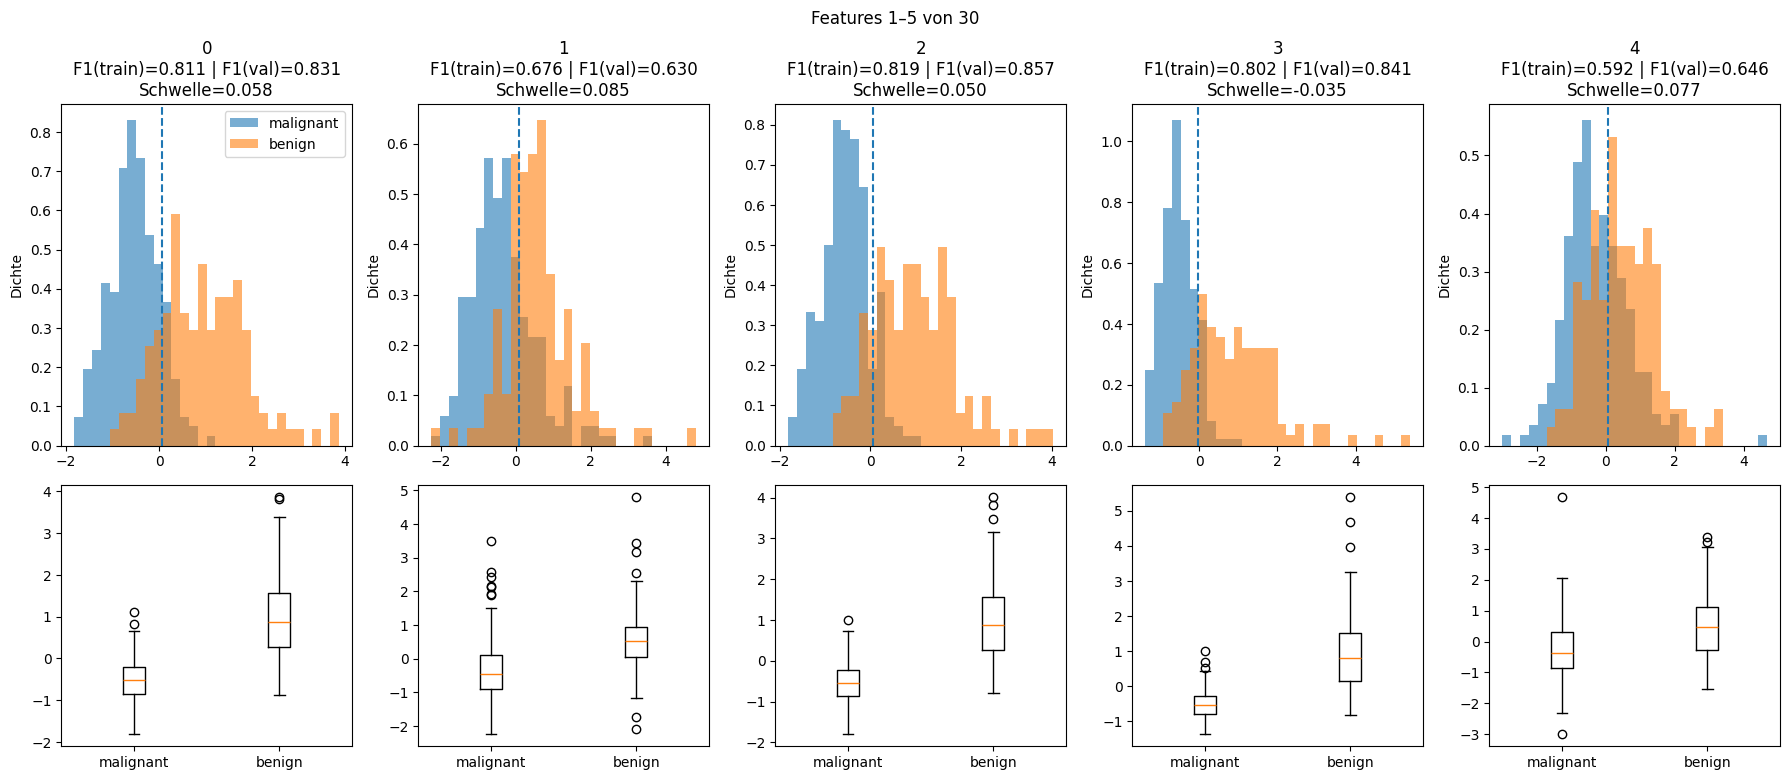

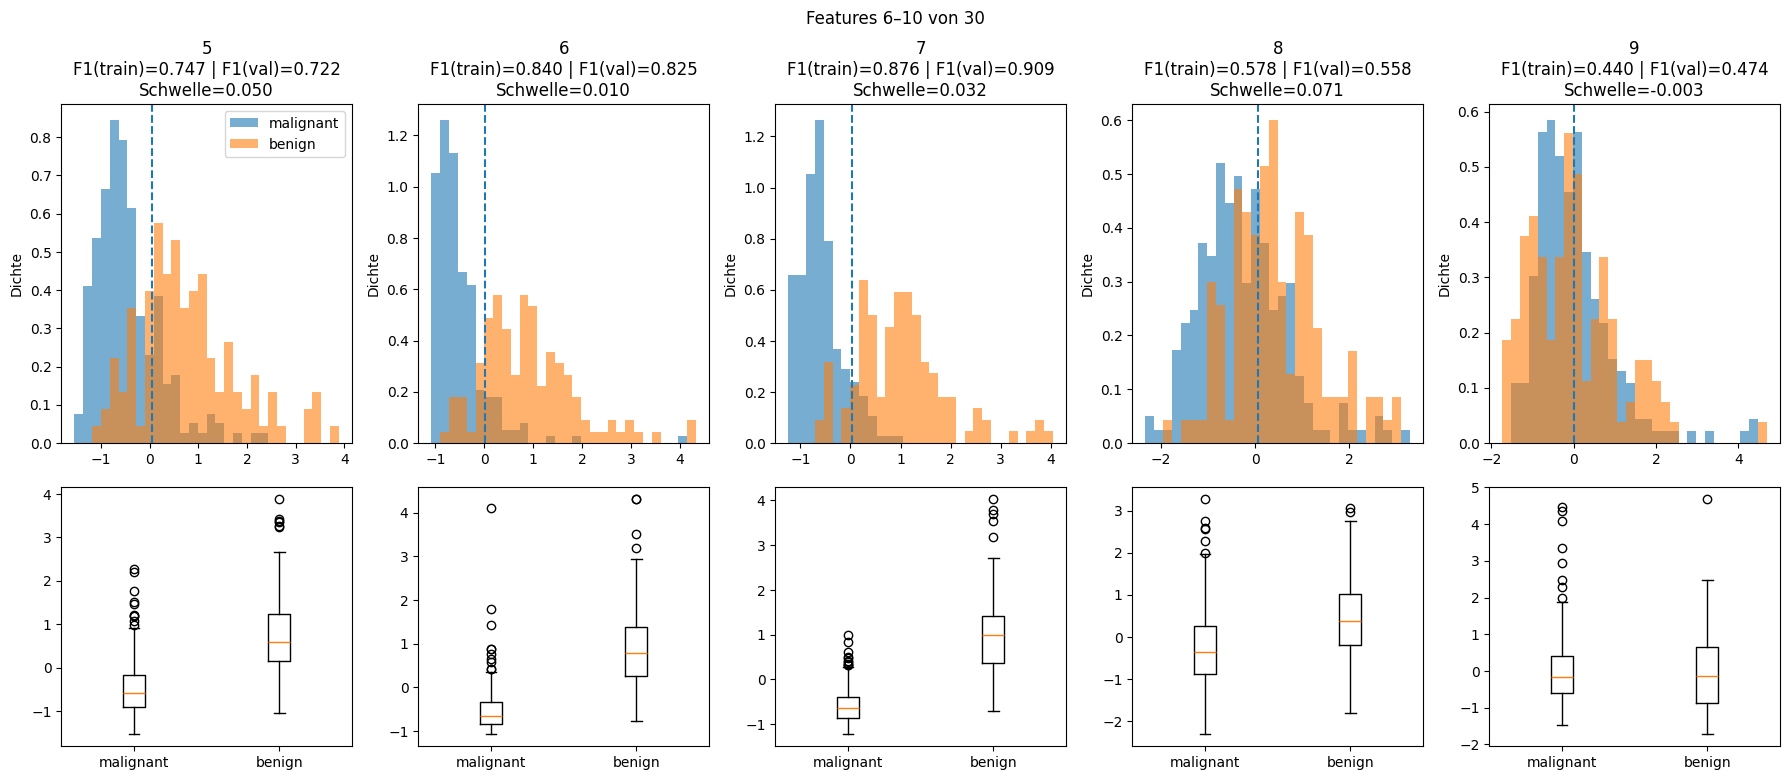

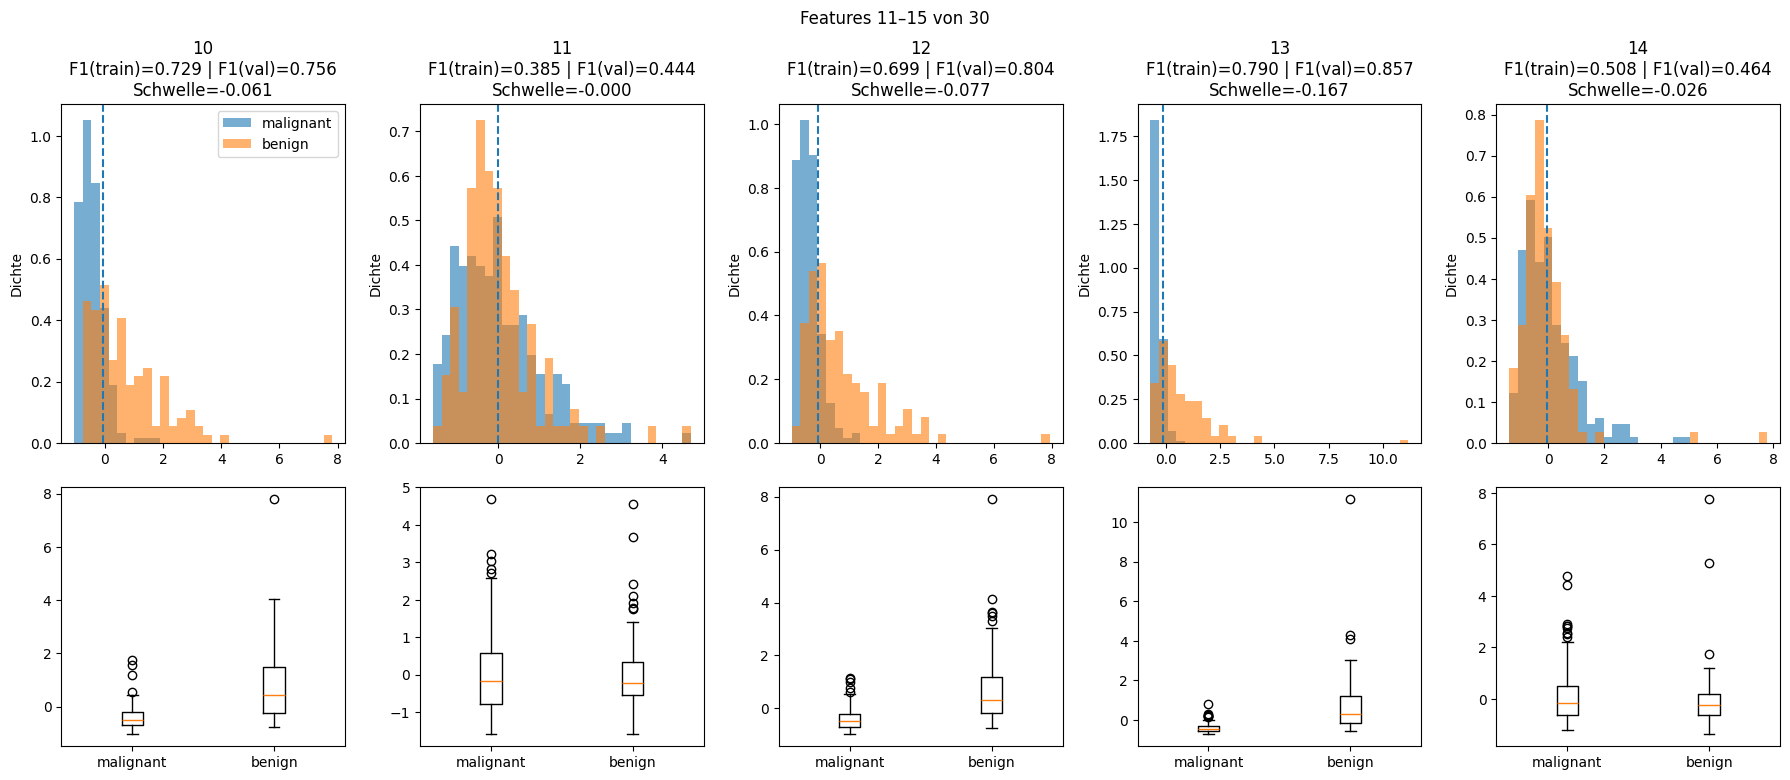

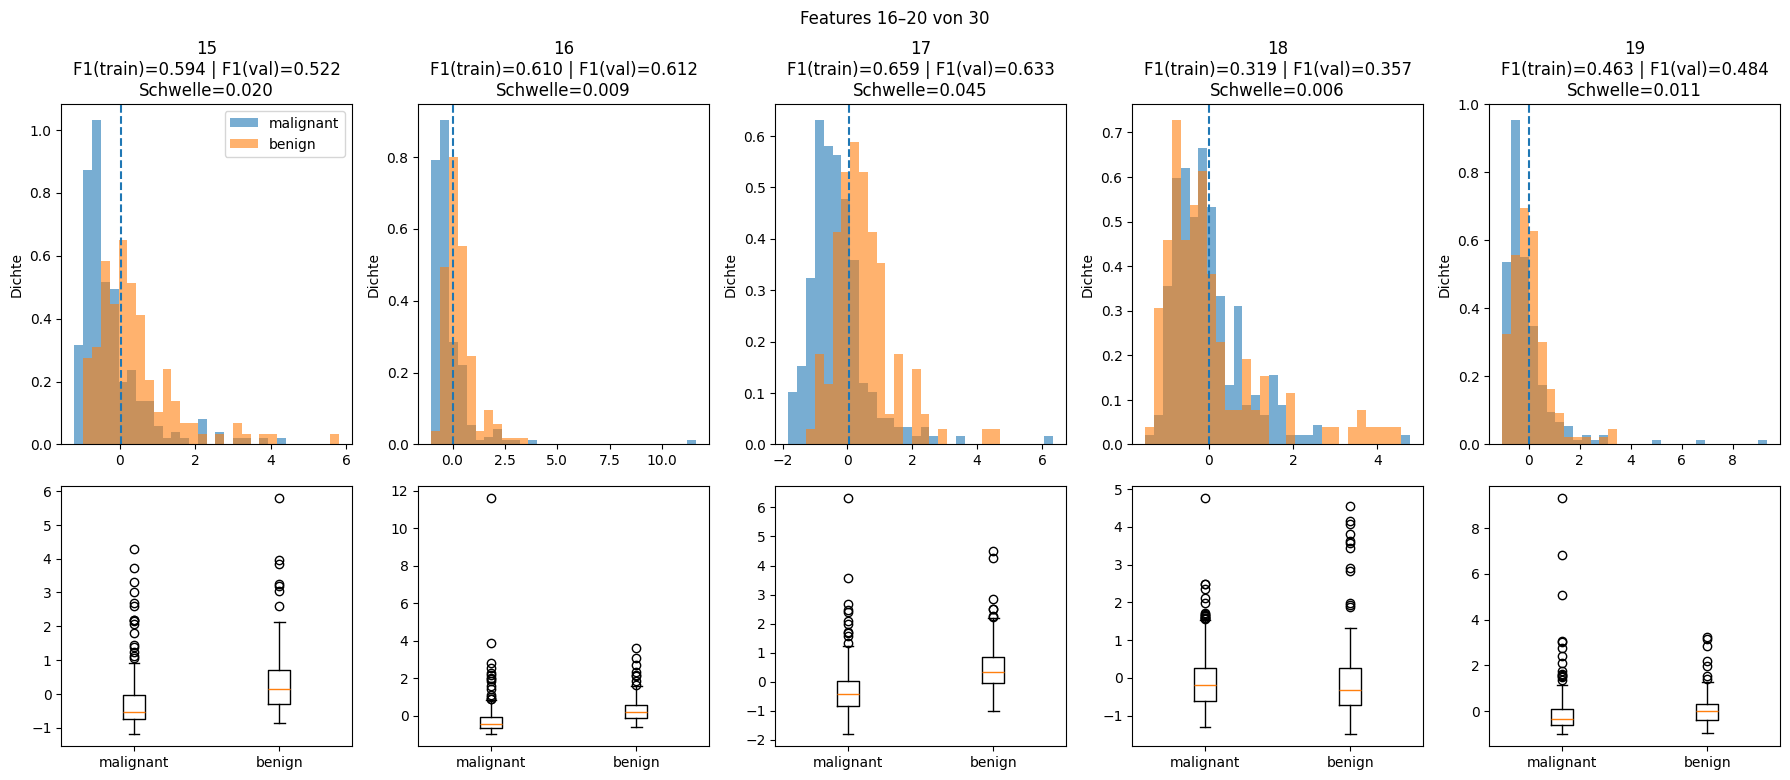

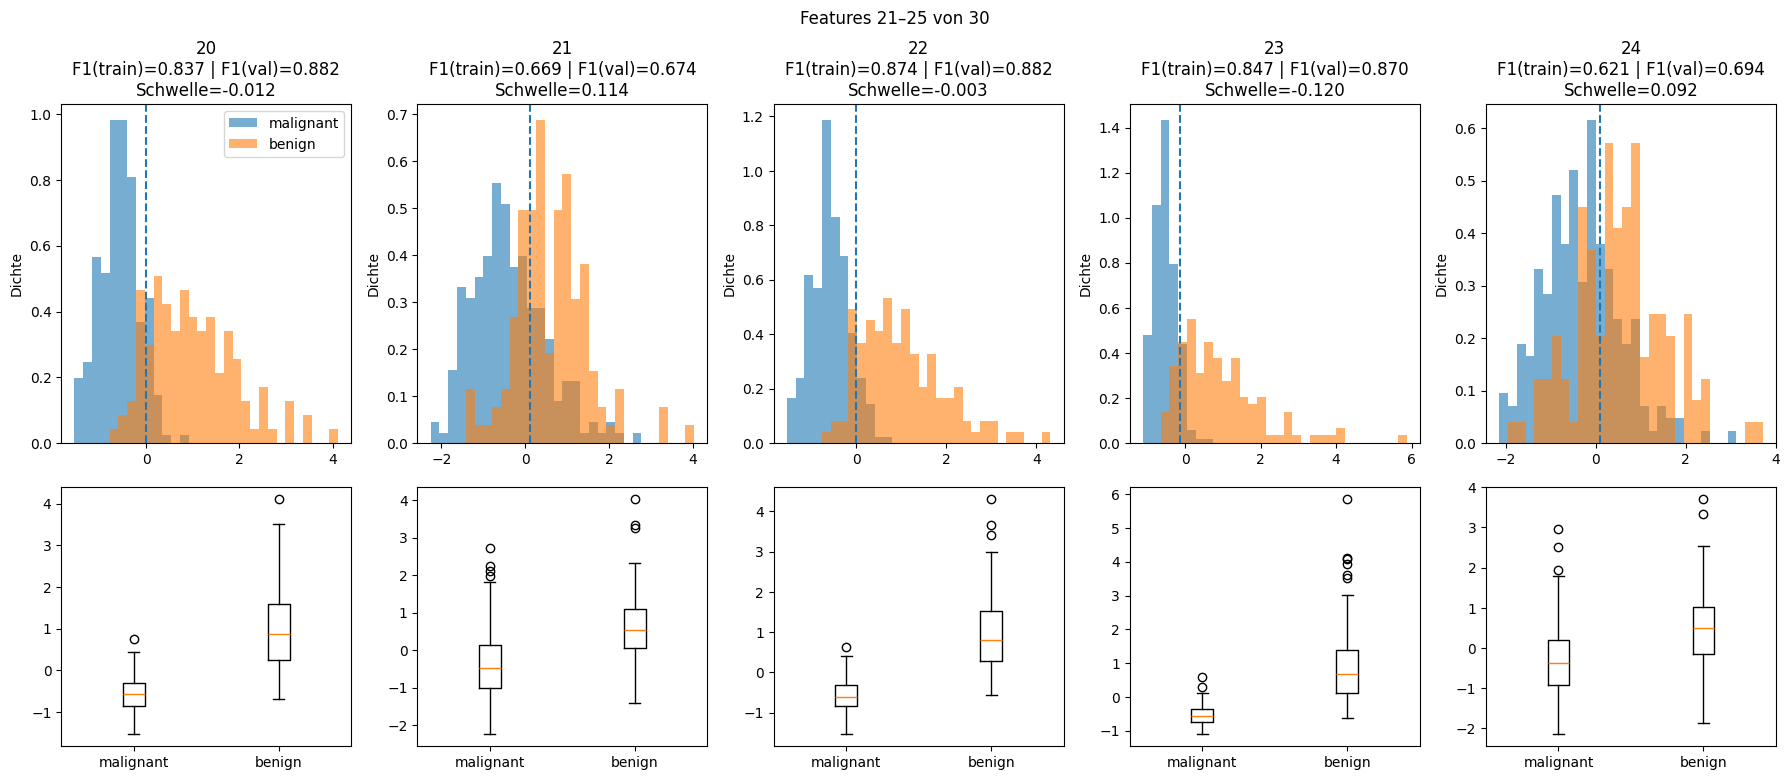

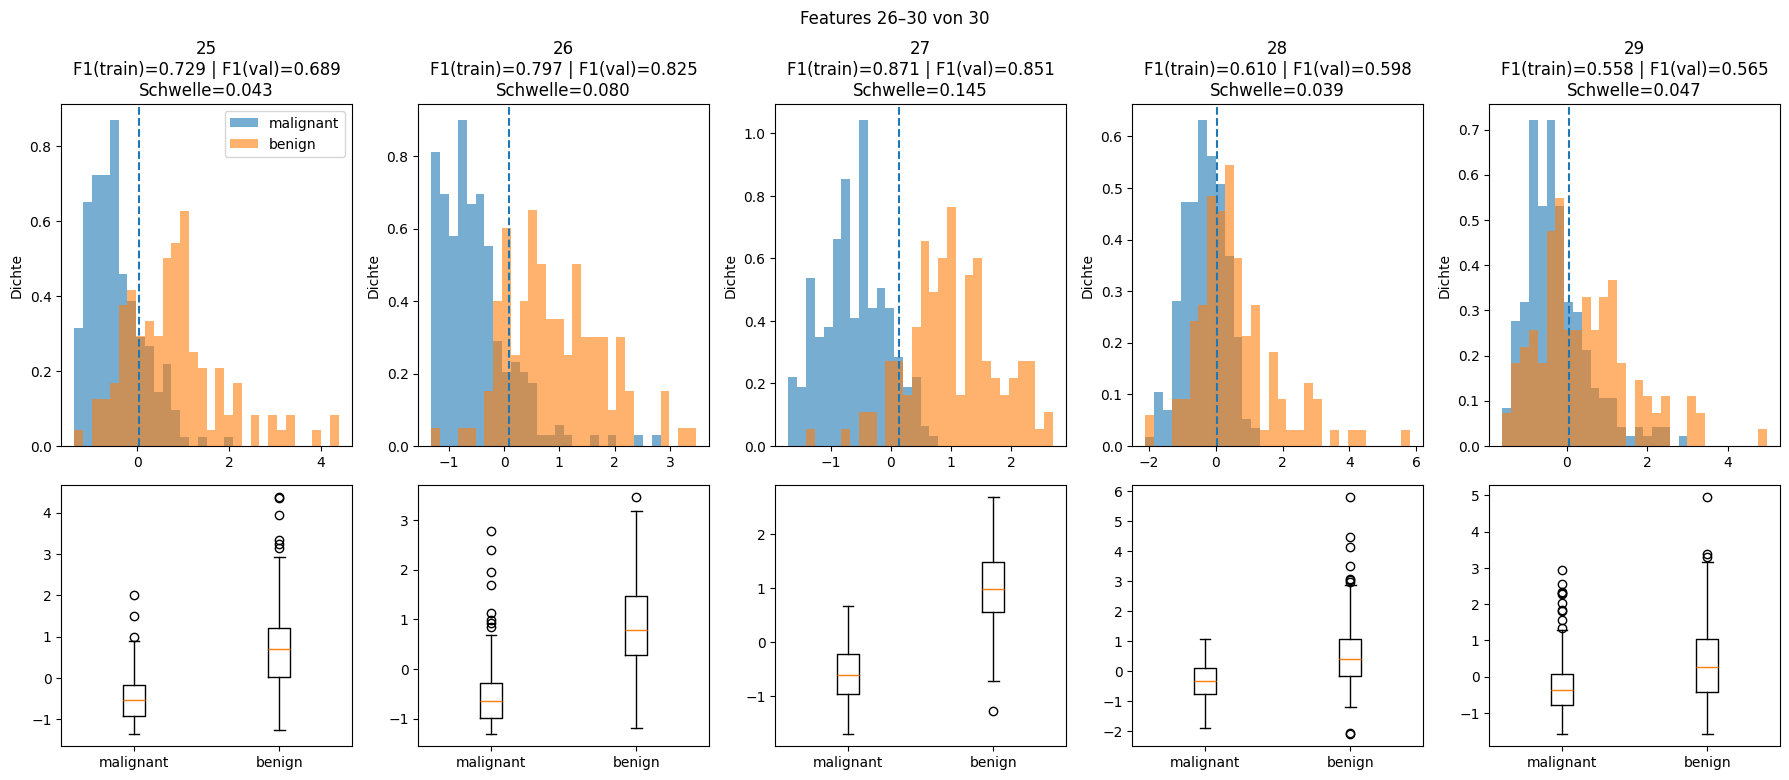

In [36]:
plot_univariate_hist_box_and_stats(
    X_train_30D, y_train,
    X_val=X_val_30D, y_val=y_val,
    cols_per_fig=5,   #anzahl der Featureplots der Zeile
    bins=30,   #Balken/Bins pro Klasse im Histogramm
    density=True,
    pos_label=0,
    class_names=list(b.target_names),
    balance=BALANCING_ON,
    random_state=RANDOM_STATE
)


# VIII) <mark>Bivariate Analyse</mark>

**Ziel**
- Einschätzen, wie gut **Feature-Paare** gemeinsam zwischen *malignant (0)* und *benign (1)* trennen.

**Was Sie sehen**
- 2D-Darstellung je **Feature-Paar** (Punkte nach Klasse eingefärbt).
- **Einfache 2D-Klassifikation**: Wir betrachten je zwei Features gleichzeitig und lassen ein **lineares Klassifikationsmodell** eine Decision Boundary finden.
- **Decision Boundary**: Zur Orientierung zeichnen wir die Decision Boundary, bei der das Modell die **Wahrscheinlichkeit für malignant auf 50%** schätzt (p(malignant | x₁, x₂) = 0.5 → An der Stelle der Decision Boundary ist die Klassenzugehörigkeit eines Punktes 50/50).
- **F1-Score (Train/Val)**: Dient auch hier wieder als grober **Indikator für das Klassifikationspotential** des jeweiligen Feature-Paares.

**Wie interpretieren**
- **Überlappung**: Weniger Überlappung ⇒ höheres Potenzial.
- **Grenzenform**: Reicht **linear** (LogReg-Linie) oder wirkt die potentielle Klassenseperation **nicht-linear**?
- **Interaktion**: Ergänzen sich die zwei Features sichtbar?
- **Redundanz**: Stark korreliert ⇒ wenig Zusatznutzen durch das zweite Feature.

**🔴 TODO:**
- Wählen Sie aus Ihren univariaten Favoriten **3–6 Features**.

- Markieren Sie ihre **2 favorisierten Paare**, auf denen Sie die Klassifikationsalgorithmen anwenden wollen.


In [37]:
#@title Click to Expand/Collapse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# --- Einfache 1D-Gauss-KDE ohne SciPy ---
def kde_gaussian_1d(x, grid, bw=None, clip=1e-12):
    x = np.asarray(x, dtype=float)
    grid = np.asarray(grid, dtype=float)
    n = len(x)
    if n == 0:
        return np.zeros_like(grid)
    if bw is None:
        s = np.std(x, ddof=1) if n > 1 else np.std(x)
        bw = s * (n ** (-1/5)) if s > 0 else 1.06 * (np.abs(x).mean() + clip) * (n ** (-1/5))
    bw = max(bw, clip)
    diffs = (grid[:, None] - x[None, :]) / bw
    den = np.exp(-0.5 * diffs**2).sum(axis=1) / (n * bw * np.sqrt(2*np.pi))
    return den


def pairplot_kde_f1_with_boundary(
    X,
    y,
    *,
    features=None,
    per_side=None,          # None = alles in 1 Figure; sonst k×k Seiten
    tile_size=2.6,          # Kachelgröße (in Zoll)
    sample_n=None,          # z.B. 400 für Performance (nur auf Train angewandt)
    pos_label=0,            # positive Klasse
    balance=True,           # class_weight='balanced' bei ungleicher Klasse
    C=1e6,                  # schwache Regularisierung ~ quasi linear
    random_state=0,
    class_names=None,
    # >>> NEU: optionales Validation-Set <<<
    X_val=None,
    y_val=None
):
    """
    Pairplot: Diagonale = KDE je Klasse;
              Off-Diagonale = Scatter je Klasse + LR-Decision-Boundary (p=0.5) + F1.
    Vollständige Matrix. Ticks überall sichtbar. Boundary wird aufs Sichtfenster gekappt.

    Wenn X_val/y_val übergeben werden:
      * Fit nur auf (X,y),
      * Zusätzliche Anzeige von F1(val) je Feature-Paar.
    """
    import re, difflib

    # --- Train in DataFrame gießen ---
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=getattr(X, "columns", None) or [f"f{i}" for i in range(np.asarray(X).shape[1])])
    y = np.asarray(y)

    # Optionales Sampling (nur Train)
    if sample_n is not None and sample_n < len(X):
        rng = np.random.RandomState(random_state)
        idx = rng.choice(len(X), size=sample_n, replace=False)
        X = X.iloc[idx].reset_index(drop=True)
        y = y[idx]

    # --- robuste Feature-Auswahl (Unterstrich/Bindestrich/Spaces egal) ---
    def _norm_name(s):
        return re.sub(r"\s+", " ", str(s).lower().replace("_", " ").replace("-", " ")).strip()
    norm_to_actual = { _norm_name(c): c for c in X.columns }

    if features is None:
        sel_actual = list(X.columns)
    else:
        req_norm = [_norm_name(c) for c in features]
        sel_actual, missing = [], []
        for raw, nrm in zip(features, req_norm):
            if nrm in norm_to_actual:
                sel_actual.append(norm_to_actual[nrm])
            else:
                missing.append(raw)
        if missing:
            all_norms = list(norm_to_actual.keys())
            suggest = {
                m: [norm_to_actual[s] for s in difflib.get_close_matches(_norm_name(m), all_norms, n=3, cutoff=0.6)]
                for m in missing
            }
            raise ValueError(
                "Folgende Features wurden nicht gefunden: "
                + ", ".join(missing)
                + ". Vorschläge: "
                + "; ".join([f"{m} -> {v}" for m, v in suggest.items()])
            )
    features = sel_actual

    # --- Validation optional aufbereiten ---
    use_val = (X_val is not None) and (y_val is not None)
    if use_val:
        if not isinstance(X_val, pd.DataFrame):
            # gleiche Spalten wie Train verwenden
            X_val = pd.DataFrame(X_val, columns=getattr(X_val, "columns", None) or list(X.columns))
        y_val = np.asarray(y_val)

    # Seitenweise aufteilen
    chunks = [features] if per_side is None else [features[i:i+per_side] for i in range(0, len(features), per_side)]

    # Klassenmasken/Labels (auf Train)
    cur_class_names = [f"neg (≠{pos_label})", f"pos ({pos_label})"] if class_names is None else class_names
    mask_pos = (y == pos_label)
    mask_neg = ~mask_pos
    y_pos = mask_pos.astype(int)  # 1 = pos_label

    for sub in chunks:
        if len(sub) == 0:
            raise ValueError("Keine gültigen Features nach dem Mapping gefunden.")
        Xsub = X[sub]
        n = len(sub)

        fig, axes = plt.subplots(n, n, figsize=(tile_size*n, tile_size*n))
        if n == 1:
            axes = np.array([[axes]])

        scatter_handles = None
        scatter_labels = None

        for i, j in itertools.product(range(n), range(n)):
            ax = axes[i, j]

            yi_name, xj_name = sub[i], sub[j]
            yi = Xsub[yi_name].to_numpy()
            xj = Xsub[xj_name].to_numpy()

            if i == j:
                # --- Diagonale: KDE je Klasse (Train) ---
                x = yi
                x0 = x[mask_neg]
                x1 = x[mask_pos]
                xmin = np.nanmin(x); xmax = np.nanmax(x)
                if not np.isfinite(xmin) or not np.isfinite(xmax) or xmin == xmax:
                    xmin, xmax = 0.0, 1.0
                grid = np.linspace(xmin, xmax, 200)
                d0 = kde_gaussian_1d(x0, grid)
                d1 = kde_gaussian_1d(x1, grid)
                ax.plot(grid, d0, label=cur_class_names[0])
                ax.plot(grid, d1, label=cur_class_names[1])
                ax.set_title(f"{yi_name}  (KDE)")
            else:
                # --- Off-Diagonale: Scatter (Train) ---
                ax.scatter(xj[mask_neg], yi[mask_neg], alpha=0.5, label=cur_class_names[0], s=8)
                ax.scatter(xj[mask_pos], yi[mask_pos], alpha=0.5, label=cur_class_names[1], s=8)
                if scatter_handles is None:
                    scatter_handles, scatter_labels = ax.get_legend_handles_labels()

                # --- Logistische Regression (2 Features), Fit nur auf TRAIN ---
                scaler = StandardScaler()
                XY_tr = np.column_stack([xj, yi])
                XYs_tr = scaler.fit_transform(XY_tr)
                lr = LogisticRegression(
                    C=C, solver="lbfgs", max_iter=1000,
                    class_weight=('balanced' if balance else None),
                    random_state=random_state
                )
                lr.fit(XYs_tr, y_pos)

                # F1 (Train) bei 0.5
                proba_tr = lr.predict_proba(XYs_tr)[:, 1]
                yhat_tr  = (proba_tr >= 0.5).astype(int)
                f1_tr = f1_score(y_pos, yhat_tr)

                # F1 (Val) optional – gleiche Feature-Reihenfolge & gleicher Scaler!
                f1_va = None
                if use_val:
                    xv = X_val[xj_name].to_numpy()
                    yv = X_val[yi_name].to_numpy()
                    XY_va = np.column_stack([xv, yv])
                    XYs_va = scaler.transform(XY_va)
                    y_val_pos = (y_val == pos_label).astype(int)
                    proba_va = lr.predict_proba(XYs_va)[:, 1]
                    yhat_va  = (proba_va >= 0.5).astype(int)
                    f1_va = f1_score(y_val_pos, yhat_va)

                # --- Boundary nur innerhalb des aktuellen Sichtfensters zeichnen ---
                xlim = ax.get_xlim()
                ylim = ax.get_ylim()
                x_line = np.linspace(xlim[0], xlim[1], 200)

                w1, w2 = lr.coef_[0]
                b0 = lr.intercept_[0]
                mu1, mu2 = scaler.mean_
                s1, s2 = scaler.scale_

                if np.abs(w2) > 1e-12:
                    # y = mu2 - (s2/w2) * (b0 + w1*(x - mu1)/s1)
                    y_line = mu2 - (s2 / w2) * (b0 + w1 * (x_line - mu1) / s1)
                    mask_vis = (y_line >= ylim[0]) & (y_line <= ylim[1])
                    if np.any(mask_vis):
                        ax.plot(x_line[mask_vis], y_line[mask_vis], linestyle="--", clip_on=True)
                else:
                    if np.abs(w1) > 1e-12:
                        x_vert = mu1 - s1 * b0 / w1
                        if xlim[0] <= x_vert <= xlim[1]:
                            ax.axvline(x_vert, linestyle="--", clip_on=True)

                # Limits fixieren
                ax.set_xlim(xlim)
                ax.set_ylim(ylim)

                # Titel mit F1(tr) und optional F1(val)
                if f1_va is None:
                    ax.set_title(f"{yi_name}\nvs\n{xj_name}\nF1(train)={f1_tr:.3f}")
                else:
                    ax.set_title(f"{yi_name}\nvs\n{xj_name}\nF1(train)={f1_tr:.3f} | F1(val)={f1_va:.3f}")

            # ===== Ticks überall sichtbar; Labels nur am Rand =====
            ax.set_xlabel(xj_name if i == n - 1 else "")
            ax.set_ylabel(yi_name if j == 0 else "")
            ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
            ax.tick_params(axis='y', which='both', left=True,  right=False, labelleft=True)

        if scatter_handles:
            fig.legend(scatter_handles, scatter_labels, loc="upper center", ncol=2, frameon=False)

        sup = (
            "\n\nPairplot Matrix:\n"
            "KDE auf der Diagonale; Off-Diagonale: Scatter + LR-Decision Boundary bei p(y_bösartig|x)=0.5.\n"
            "F1(tr)" + (" & F1(val)" if use_val else "") +
            " geben Hinweise auf die Klassifizierbarkeit der jeweiligen Feature-Paare."
        )
        fig.suptitle(sup, y=0.995)
        plt.tight_layout(rect=[0, 0, 1, 0.985])
        plt.show()


In [38]:
#Komplettes Grid. Nicht zu empfehlen! --> Dauert lange und ist unübersichtlich
#pairplot_kde_f1_with_boundary(X_train, y_train, per_side=None, class_weight="balanced", tile_size=2.4, pos_label=0, random_state=RANDOM_STATE, balance=BALANCING_ON, class_names = {0: "maligne", 1: "benigne"})


#Featurenamen zum kopieren:
#'mean radius' 'mean texture' 'mean perimeter' 'mean area' 'mean smoothness' 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry' 'mean fractal dimension'
#'radius error' 'texture error' 'perimeter error' 'area error' 'smoothness error' 'compactness error' 'concavity error' 'concave points error' 'symmetry error' 'fractal dimension error'
#'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness' 'worst concavity' 'worst concave points' 'worst symmetry' 'worst fractal dimension'

#🔴TODO: Tragen sie hier ihre Featurenamen ein, die Sie bivariat Analysieren wollen
sel = ["texture error", "fractal dimension error"]
pairplot_kde_f1_with_boundary(X_train_30D, y_train, X_val=X_val_30D, y_val=y_val, features=sel, per_side=None, tile_size=3, pos_label=0, random_state=RANDOM_STATE, balance=BALANCING_ON, class_names = {0: "maligne", 1: "benigne"})




ValueError: Folgende Features wurden nicht gefunden: texture error, fractal dimension error. Vorschläge: texture error -> []; fractal dimension error -> []

# IX) <mark>Reduktion auf 2D (2 Features)</mark>

**Kontext**
- Nach der **univariaten** und **bivariaten** Sichtung legen wir jetzt die **2D-Darstellung** fest, auf der die nächsten Klassifikatoren trainiert und visualisiert werden.
- Zwei Wege stehen zur Wahl:
  1) **Zwei konkrete Features** (aus Ihren zuvor markierten Favoriten)
  2) **PCA(2)** – automatische Projektion aller Features auf zwei Hauptachsen (PC1/PC2)

**Was hier getan wird**
- Die Daten werden auf **zwei Dimensionen** reduziert (pro Split: Train/Val/Test bleiben erhalten).
- Bei **Feature-Paar** heißen die Achsen wie die gewählten Spalten.
- Bei **PCA(2)** heißen die Achsen **PC1** und **PC2** (fit **nur auf Train**, dann Transform von Val/Test).

---

## 🔴 TODO – Ihre Aufgabe
- Entscheiden Sie sich für einen Weg:
  - **Feature-Paar:** Wählen Sie **2 Features** aus Ihren univariaten/bivariaten Favoriten.
  - **PCA(2):** Nutzen Sie die 2D-Projektion (**feature_pair=None**).
---

### Hinweise
- **Normalisierung:** Falls zuvor **`normalize_data_after_split=True`**, wird **keine** zusätzliche Skalierung vor PCA durchgeführt (keine Doppel-Normalisierung).  
  Andernfalls wird **vor** der PCA automatisch z-gescaled (fit auf Train).
- **Reproduzierbarkeit:** Verwenden Sie überall den globalen **`RANDOM_STATE`**.
- **Konsistenz:** Split (60/20/20) und Stratifizierung bleiben unverändert – wir wechseln **nur** die 2D-Repräsentation.




In [ ]:
#@title Click to Expand/Collapse
from typing import Iterable, Optional, Tuple
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def reduce_to_2d_for_viz(
    X_train: pd.DataFrame,
    X_val: pd.DataFrame,
    X_test: pd.DataFrame,
    y_train,
    y_val,
    y_test,
    *,
    feature_pair: Optional[Iterable[str]] = None,
    random_state: int = RANDOM_STATE,   # ← globaler Seed (Reproduzierbarkeit)
    verbose: bool = True,
    normalize_data_after_split: bool = False
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, np.ndarray, np.ndarray, np.ndarray]:
    """
    Reduziert Train/Val/Test auf **2 Dimensionen** – entweder:
      1) **Feature-Auswahl**: genau die zwei benannten Spalten (ohne PCA), falls `feature_pair`
         zwei gültige, verschiedene Spaltennamen enthält und in allen Splits vorhanden ist.
      2) **PCA(2)**: StandardScaler (falls notwendig) + PCA(n_components=2) auf dem **Train**-Split fitten,
         danach **Val/Test** darauf projizieren (keine Leakage).

    Parameter
    ---------
    X_train, X_val, X_test : pd.DataFrame
        Feature-Splits (müssen DataFrames mit Spaltennamen sein).
    y_train, y_val, y_test : array-artig
        Zielvariablen (werden unverändert als Arrays zurückgegeben).
    feature_pair : Iterable[str] | None
        Zwei Spaltennamen für die reine **Feature-Auswahl** (kein PCA),
        z. B. ("mean radius", "mean texture"). Falls ungültig → Fallback auf PCA.
    random_state : int
        Seed für PCA (Reproduzierbarkeit). Nutzt globalen `RANDOM_STATE`.
    verbose : bool
        Steuert Konsolenausgaben (Modus/Normalisierung).
    normalize_data_after_split : bool
        Falls **False**: Hier wird vor PCA **z-standardisiert** (Fit auf Train).
        Falls **True**: Es wird **keine** zusätzliche Skalierung durchgeführt
        (Annahme: Skalierung erfolgte bereits in `split_train_val_test`).

    Rückgabe
    --------
    (X_train_2d, X_val_2d, X_test_2d, y_train, y_val, y_test)
        - Bei Feature-Auswahl: Spaltennamen entsprechen `feature_pair`.
        - Bei PCA: DataFrames mit Spalten **"PC1"**, **"PC2"**.

    Hinweise
    --------
    - PCA wird **nur auf dem Trainingssplit** gefittet und dann auf Val/Test angewendet.
    - Es erfolgt **kein** Labeling/Modelling in dieser Funktion; reine 2D-Repräsentation.
    """
    # --- Typprüfung: Alle X-Splits müssen DataFrames mit Spaltennamen sein ---
    if not isinstance(X_train, pd.DataFrame) or not isinstance(X_val, pd.DataFrame) or not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_train, X_val, X_test müssen pandas.DataFrame sein (mit Spaltennamen).")

    mode = "pca"              # Default: PCA (falls kein gültiges feature_pair)
    cols_out = ["PC1", "PC2"]  # Platzhalter (nur für 'features'-Modus relevant)

    # --- Prüfe feature_pair (zwei verschiedene, vorhandene Spaltennamen in allen Splits) ---
    if feature_pair is not None:
        fp = list(feature_pair)
        if len(fp) == 2 and isinstance(fp[0], str) and isinstance(fp[1], str) and fp[0] != fp[1]:
            both_in_train = all(c in X_train.columns for c in fp)
            both_in_val   = all(c in X_val.columns   for c in fp)
            both_in_test  = all(c in X_test.columns  for c in fp)
            if both_in_train and both_in_val and both_in_test:
                mode = "features"
                cols_out = fp
            else:
                if verbose:
                    print(f"[reduce_to_2d_for_viz] feature_pair {fp} nicht in allen Splits vorhanden -> fallback PCA.")
        else:
            if verbose:
                print(f"[reduce_to_2d_for_viz] Ungültiges feature_pair {feature_pair} -> fallback PCA.")

    # --- Modus 1: Exakt zwei Features verwenden (ohne PCA/Skalierung) ---
    if mode == "features":
        Xtr2 = X_train[cols_out].copy()
        Xva2 = X_val[cols_out].copy()
        Xte2 = X_test[cols_out].copy()
        if verbose:
            print(f"[reduce_to_2d_for_viz] Modus: FEATURES -> {cols_out}")
        # y werden als Arrays zurückgegeben (Form beibehalten)
        return Xtr2, Xva2, Xte2, np.asarray(y_train), np.asarray(y_val), np.asarray(y_test)

    # --- Modus 2: PCA(2) (Fit nur auf TRAIN) ---
    if verbose:
        print("[reduce_to_2d_for_viz] Modus: PCA(2) (fit auf TRAIN)")

    # Falls zuvor NICHT skaliert wurde: hier z-standardisieren (Fit auf Train)
    if normalize_data_after_split is False:
        print("[reduce_to_2d_for_viz] Performe die notwendige Datennormalisierung vor der PCA")
        scaler = StandardScaler().fit(X_train)      # Fit auf Train
        Xtr_s = scaler.transform(X_train)
        Xva_s = scaler.transform(X_val)
        Xte_s = scaler.transform(X_test)
    else:
        # Hier wird angenommen, dass bereits in split_train_val_test skaliert wurde
        print("[reduce_to_2d_for_viz] Performe PCA ohne vorherige Normalisierung, "
              "unter Annahme, dass die Daten vorher schon normalisiert wurden in [split_train_val_test] "
              "--> siehe parameter normalize_data_after_split")
        # PCA erwartet Arrays → DataFrames in Arrays umwandeln
        Xtr_s = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        Xva_s = X_val.values   if isinstance(X_val,   pd.DataFrame) else X_val
        Xte_s = X_test.values  if isinstance(X_test,  pd.DataFrame) else X_test

    # PCA(2): Fit auf Train, dann alle Splits transformieren
    pca = PCA(n_components=2, random_state=random_state).fit(Xtr_s)  # Hauptachsen aus Train lernen
    Ztr = pca.transform(Xtr_s)  # Projektion Train
    Zva = pca.transform(Xva_s)  # Projektion Val
    Zte = pca.transform(Xte_s)  # Projektion Test

    # Zurück in DataFrames mit sprechenden Spaltennamen (PC1/PC2)
    Xtr2 = pd.DataFrame(Ztr, columns=["PC1", "PC2"], index=X_train.index)
    Xva2 = pd.DataFrame(Zva, columns=["PC1", "PC2"], index=X_val.index)
    Xte2 = pd.DataFrame(Zte, columns=["PC1", "PC2"], index=X_test.index)

    return Xtr2, Xva2, Xte2, np.asarray(y_train), np.asarray(y_val), np.asarray(y_test)


In [ ]:
#Featurenamen zum kopieren:
#'mean radius' 'mean texture' 'mean perimeter' 'mean area' 'mean smoothness' 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry' 'mean fractal dimension'
#'radius error' 'texture error' 'perimeter error' 'area error' 'smoothness error' 'compactness error' 'concavity error' 'concave points error' 'symmetry error' 'fractal dimension error'
#'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness' 'worst concavity' 'worst concave points' 'worst symmetry' 'worst fractal dimension'

# Reduktion NUR auf diese beiden Features
X_train, X_val, X_test, y_train, y_val, y_test = reduce_to_2d_for_viz(
    X_train_30D, X_val_30D, X_test_30D, y_train, y_val, y_test,
    feature_pair=("texture error", "fractal dimension error"),  # 🔴TODO: tragen sie ihre 2 favouriten Feature ein
    #feature_pair=None,                              # 🔴TODO: Einkommentieren und obere Zeile Auskommentieren für die PCA
    random_state=RANDOM_STATE,
    normalize_data_after_split=normalize_data_after_split,
)


print("\n")
print("Übersicht 2D Reduzierter Trainingsfeatures")
print("\n")
print(X_train.info())

##Training und Validationsdatenset Plotten

In [ ]:
#@title Click to Expand/Collapse
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def simple_scatter_train_val(
    X_train_2D, X_val_2D, y_train, y_val,
    *,
    target_names=None,           # z.B. {0: "maligne", 1: "benigne"}
    alpha=0.7, s=10,
    figsize=(10, 4),
    share_limits=True
):
    # erste zwei Spalten verwenden (egal ob Feature-Paar oder PC1/PC2)
    xcol, ycol = X_train_2D.columns[:2].tolist()
    Xtr = X_train_2D[[xcol, ycol]].to_numpy()
    Xva = X_val_2D[[xcol, ycol]].to_numpy()
    ytr = np.asarray(y_train)
    yva = np.asarray(y_val)

    classes = np.unique(np.concatenate([ytr, yva]))
    classes = np.sort(classes)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharex=share_limits, sharey=share_limits)

    # konsistente Farbzuordnung über C0, C1, ...
    for idx, c in enumerate(classes):
        mtr = (ytr == c)
        mva = (yva == c)
        color = f"C{idx}"  # C0=blau, C1=orange

        ax1.scatter(Xtr[mtr, 0], Xtr[mtr, 1], s=s, alpha=alpha, c=color)
        ax2.scatter(Xva[mva, 0], Xva[mva, 1], s=s, alpha=alpha, c=color)

    ax1.set_title("Train"); ax1.set_xlabel(xcol); ax1.set_ylabel(ycol)
    ax2.set_title("Val");   ax2.set_xlabel(xcol); ax2.set_ylabel(ycol)

    # gleiche Limits + kleiner Rand
    if share_limits:
        xmin = min(Xtr[:,0].min(), Xva[:,0].min()); xmax = max(Xtr[:,0].max(), Xva[:,0].max())
        ymin = min(Xtr[:,1].min(), Xva[:,1].min()); ymax = max(Xtr[:,1].max(), Xva[:,1].max())
        dx = xmax - xmin if xmax > xmin else 1.0
        dy = ymax - ymin if ymax > ymin else 1.0
        pad_x, pad_y = 0.05*dx, 0.05*dy
        for ax in (ax1, ax2):
            ax.set_xlim(xmin - pad_x, xmax + pad_x)
            ax.set_ylim(ymin - pad_y, ymax + pad_y)

    # Legende aus target_names (einmal zentral)
    if target_names is not None:
        handles, labels = [], []
        for idx, c in enumerate(classes):
            handles.append(Line2D([0],[0], marker='o', color='w',
                                  markerfacecolor=f"C{idx}", markersize=8, linewidth=0))
            labels.append(target_names.get(int(c), str(c)))
        fig.legend(handles, labels, title="Klasse", loc="upper center", ncol=len(classes), frameon=False)

    plt.tight_layout(rect=[0, 0, 1, 0.95] if target_names is not None else None)
    plt.show()







##Kontrollplot (Train/Val)

In [ ]:
target_names = {0: "maligne", 1: "benigne"}
simple_scatter_train_val(X_train, X_val, y_train, y_val, target_names=target_names)

# X) <mark>Training & Validation der Klassifikationsalgorithmen</mark>

**Kontext**
- Sie arbeiten jetzt mit den **2D-Features** aus Kapitel IX.
- Globale Schalter (Balancing/Normalisierung/Seed) sind **bereits gesetzt**.
- **Ihre einzige Aufgabe:** ein **kleines Hyperparameter-Gitter** für die Klassifikationsalgorithmen festlegen; alles Weitere läuft automatisch
  (Training auf Train, Bewertung auf Val, Decision-Boundary & Confusion-Matrix).

### 🔴 TODO
- Pro Hyperparameter **2–4 sinnvolle Werte** festlegen.

---

## Woran orientieren beim Einstellen

**Decision Tree**
- `max_depth`: höher = **mehr Splits** (feiner); niedriger = **weniger Splits** (grober).
- `min_samples_split`: höher = **seltener teilen** (robuster/grober); niedriger = **früher teilen** (feiner).


**Logistische Regression**
- `C` (inverse Strafstärke): größer = **passt stärker an**; kleiner = **glatter/zurückhaltender**.

**SVM (RBF)**
- `C`: größer = **mehr Punkte korrekt trennen wollen**; kleiner = **mehr Fehler zulassen** (glatter).
- `gamma`: größer = **sehr lokale Effekte** (fein-wellig); kleiner = **breitere Effekte** (glatter).

**k-NN**
- `n_neighbors (k)`: klein = **sehr lokal/empfindlich**; groß = **stärkeres Mitteln/stabiler**.
- `weights`: `"uniform"` = alle gleich; `"distance"` = **nähere** zählen **mehr**.

**Praktisch**
- Klein starten, dann gezielt nachschärfen.
- Auf **F1(Val)** und die **sichtbare Grenze** schauen: wirkt sie zu „zackig“, Parameter eher in Richtung „glatter“ setzen (z. B. `max_depth↓`, `min_samples_leaf↑`, `C↓`, `gamma↓`, `k↑`).
- Reminder: Positive Klasse ist **malignant = 0** (F1/Recall beziehen sich darauf).



## IX)-I) (Plot-)HelferFunktionen (Der Klassifikationsalgorithmen)

In [ ]:
#@title Click to Expand/Collapse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay


# Zelle 2:  Helper Funktionen


import numpy as np
import pandas as pd
from typing import Tuple

import pandas as pd
from typing import Tuple

def get_joint_axis(X1: pd.DataFrame, X2: pd.DataFrame,
                   frac: float = 0.05,
                   eps: float = 0.0) -> Tuple[float, float, float, float]:
    """
    Gemeinsame Achsengrenzen für zwei 2D-DataFrames.
    Padding je Achse = max(frac * Spannweite, eps).
    Keine fixe Margin mehr.

    Parameters
    ----------
    X1, X2 : pd.DataFrame
        Jeweils genau zwei Spalten, gleiche Reihenfolge/Namen.
    frac : float, default 0.05
        Proportionale Polsterung (z. B. 5% der Spannweite).
    eps : float, default 0.0
        Optionales Minimal-Padding (nur genutzt, wenn Spannweite=0).

    Returns
    -------
    (x_min, x_max, y_min, y_max)
    """
    if not isinstance(X1, pd.DataFrame) or not isinstance(X2, pd.DataFrame):
        raise TypeError("X1 and X2 must be pandas DataFrames with column names.")
    cols = X1.columns.tolist()
    if len(cols) < 2 or cols != X2.columns.tolist():
        raise ValueError("X1 and X2 must have the same two columns.")

    # X-Achse
    x_min_raw = min(X1[cols[0]].min(), X2[cols[0]].min())
    x_max_raw = max(X1[cols[0]].max(), X2[cols[0]].max())
    x_span = x_max_raw - x_min_raw
    x_pad = max(frac * x_span, eps)
    x_min, x_max = x_min_raw - x_pad, x_max_raw + x_pad

    # Y-Achse
    y_min_raw = min(X1[cols[1]].min(), X2[cols[1]].min())
    y_max_raw = max(X1[cols[1]].max(), X2[cols[1]].max())
    y_span = y_max_raw - y_min_raw
    y_pad = max(frac * y_span, eps)
    y_min, y_max = y_min_raw - y_pad, y_max_raw + y_pad

    return x_min, x_max, y_min, y_max


def pretty_param_string(params):
    """
    Formatiert ein Dict von Hyperparametern schön lesbar.

    Beispiel:
      {'C': 0.001, 'max_iter': 1000} -> 'C=0.0010, max_iter=1000'

    Gibt 'n/a' unverändert zurück.
    """
    if params == "n/a":
        return params
    return ", ".join(
        [
            f"{k}={v:.4f}" if isinstance(v, float) or isinstance(v, np.floating) else f"{k}={v}"
            for k, v in params.items()
        ]
    )


def plot_decision_boundary_detailed(model, X, y, ax, axis_limits):
    """
    Zeichnet die Entscheidungsfläche eines binären Klassifikators + Punkte
    (korrekte als Kreise, falsche als X) und blendet darunter eine
    Confusion-Matrix ein. **Farbkonvention wie in deinem Notebook:**
      - Klasse 0 (Bösartig): orange
      - Klasse 1 (Gutartig): royalblue

    WICHTIG:
      - Die Achsenlabels werden aus `X_train.columns` genommen, wie in deinem
        Notebook vorgesehen (bewusste Kopplung). Wenn du das vermeiden willst,
        könntest du stattdessen `X.columns` verwenden (siehe Kommentar unten).

    Parameter
    ---------
    model : sklearn-kompatibles Modell
        Muss `.predict(...)` unterstützen.
    X : np.ndarray oder pd.DataFrame, shape (n_samples, 2)
        2D-Features des aktuellen Splits (Train/Val).
    y : array-like, shape (n_samples,)
        Zielklassen, erwartet {0,1}.
    ax : matplotlib.axes.Axes
        Achse, auf die geplottet wird.
    axis_limits : Tuple[float, float, float, float]
        (x_min, x_max, y_min, y_max) für konsistente Achsenlimits.
    """
    # Gitterauflösung (kleiner = schneller, größer = glattere Kante)
    h = .02
    x_min, x_max, y_min, y_max = axis_limits

    # Entscheidungsfläche vorhersagen
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Sicherstellen, dass immer zwei Farben genutzt werden (auch wenn eine Klasse fehlt)
    unique_pred = np.unique(Z)
    if set(unique_pred) == {0}:                 # nur Klasse 0 vorhergesagt
        custom_cmap = ListedColormap(['orangered', 'orangered'])
    elif set(unique_pred) == {1}:               # nur Klasse 1 vorhergesagt
        custom_cmap = ListedColormap(['royalblue', 'royalblue'])
    else:
        custom_cmap = ListedColormap(['orangered', 'royalblue'])

    # Entscheidungsregionen einfärben
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap, levels=np.arange(-0.5, 2, 1))

    # Für Indexing ggf. in NumPy wandeln
    X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X

    # Punktmarker je nach Korrektheit der Vorhersage
    y_pred = model.predict(X)
    idx_tp = np.where((y == 0) & (y_pred == 0))[0]  # Bösartig richtig
    idx_fn = np.where((y == 0) & (y_pred == 1))[0]  # Bösartig falsch
    idx_tn = np.where((y == 1) & (y_pred == 1))[0]  # Gutartig richtig
    idx_fp = np.where((y == 1) & (y_pred == 0))[0]  # Gutartig falsch

    # Streuung der Punkte (Farben/Marker wie in deinen Plots)
    if len(idx_tp):
        ax.scatter(X_np[idx_tp, 0], X_np[idx_tp, 1], c='orange',   marker='o', s=60, edgecolor='k',
                   label="Bösartig richtig (TP)", alpha=0.9)
    if len(idx_fn):
        ax.scatter(X_np[idx_fn, 0], X_np[idx_fn, 1], c='orange',   marker='X', s=80, edgecolor='k',
                   label="Bösartig falsch (FN)",  alpha=0.9)
    if len(idx_tn):
        ax.scatter(X_np[idx_tn, 0], X_np[idx_tn, 1], c='royalblue',marker='o', s=60, edgecolor='k',
                   label="Gutartig richtig (TN)", alpha=0.9)
    if len(idx_fp):
        ax.scatter(X_np[idx_fp, 0], X_np[idx_fp, 1], c='royalblue',marker='X', s=80, edgecolor='k',
                   label="Gutartig falsch (FP)",  alpha=0.9)

    # Achsenbeschriftungen
    # HINWEIS: Diese Funktion nutzt bewusst `X_train.columns` (deine Notebook-Konvention).
    # Wenn du stattdessen spaltspezifisch aus X labeln willst:
    #   if isinstance(X, pd.DataFrame): ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1])
    ax.set_xlabel(X_train.columns.values[0])
    ax.set_ylabel(X_train.columns.values[1])

    ax.set_xlim(axis_limits[0], axis_limits[1])
    ax.set_ylim(axis_limits[2], axis_limits[3])

    # Legende rechts außerhalb
    ax.legend(loc="upper left", bbox_to_anchor=(1.25, 1))

    # ==== Confusion Matrix als eigenes kleines Axes-Objekt UNTER dem Plot ====
    # Wir nutzen das Bounding-Box-Layout der Hauptachse und platzieren
    # darunter eine kleine Achse (gleiches Verfahren wie in deinem Code).
    bbox = ax.get_position()
    width  = bbox.width * 0.6
    height = bbox.height * 0.27
    center_x = bbox.x0 + bbox.width / 2 - width / 2
    below_y  = bbox.y0 - height - 0.02  # kleiner Abstand
    cm_ax = ax.figure.add_axes([center_x, below_y, width, height])

    cm = confusion_matrix(y, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bösartig', 'Gutartig'])
    disp.plot(ax=cm_ax, cmap='Blues', colorbar=False)

    # Styling der CM anpassen (Beschriftungen/Spines)
    cm_ax.set_xlabel('Vorhersage', fontsize=9)
    cm_ax.set_ylabel('Tatsächlich', fontsize=9)
    cm_ax.set_title('')
    cm_ax.tick_params(axis='both', which='major', labelsize=9)
    for label in cm_ax.texts:  # Zahlen in den Zellen größer
        label.set_fontsize(12)
    cm_ax.patch.set_alpha(0)   # transparenter Hintergrund
    for spine in cm_ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.8)


# ==== Helper: Oversampling (einfaches Duplizieren der Minderheitsklasse) ====

def oversample_simple(X, y, rng_state: int = 42):
    """
    Sehr einfache Form von Oversampling:
      - Finde die Häufigkeit pro Klasse.
      - Wiederhole zufällig Beispiele der Minderheitsklasse(n), bis alle Klassen
        gleich viele Beispiele haben (entspricht 'RandomOverSampler' ohne Pip).

    Parameter
    ---------
    X : np.ndarray oder pd.DataFrame, shape (n_samples, n_features)
        Eingabefeatures. Sowohl NumPy als auch Pandas werden unterstützt.
    y : array-like, shape (n_samples,)
        Zielklassen.
    rng_state : int, optional (default=42)
        Seed für die Reproduzierbarkeit der zufälligen Duplikation.

    Returns
    -------
    X_resampled : gleiche Struktur wie X (np.ndarray oder pd.DataFrame)
        Oversampletes Feature-Array/Frame.
    y_resampled : np.ndarray
        Oversampleter Label-Vektor.
    """
    rng = np.random.RandomState(rng_state)
    y_arr = np.asarray(y)

    classes, counts = np.unique(y_arr, return_counts=True)
    max_n = counts.max()

    idx_all = []
    for cls, n in zip(classes, counts):
        cls_idx = np.where(y_arr == cls)[0]
        # so viele zusätzliche Indizes ziehen, bis Klassen gleich groß sind
        extra = rng.choice(cls_idx, size=max_n - n, replace=True) if max_n > n else np.array([], dtype=int)
        idx_all.append(np.concatenate([cls_idx, extra]))
    idx_all = np.concatenate(idx_all)
    rng.shuffle(idx_all)

    # robustes Indexing für NumPy / Pandas (Form von X beibehalten)
    def _take_rows(A, idx):
        return A.iloc[idx] if hasattr(A, "iloc") else A[idx]

    X_res = _take_rows(X, idx_all)
    y_res = y_arr[idx_all]
    return X_res, y_res


##IX)-II)Support Vector Machine mit linearem Kernel

In [ ]:
#@title Click to Expand/Collapse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def run_final_testcell(
    X_train_2D, y_train, X_val_2D, y_val, X_test_2D, y_test,
    *,
    # aus Kapitel X übergeben (bereits ausgewählte Bestwerte je Modell):
    best_params_knn, best_train_f1_knn, best_val_f1_knn,
    best_params_svm_lin, best_train_f1_lin, best_val_f1_lin,
    best_params_svm_rbf, best_train_f1_rbf, best_val_f1_rbf,
    best_params_tree, best_train_f1_tree, best_val_f1_tree,
    balance=BALANCING_ON   # globaler Schalter (bool)
):
    """
    Finale Messung / Deployment-ähnlicher Ablauf auf 2D-Features (PCA/Feature-Pair bereits erfolgt).

    Schritte (funktional unverändert):
      1) Wähle das beste Modell anhand des übergebenen **Validation-F1** (höchster Wert).
      2) Bilde **DEV = Train ∪ Val** (ohne erneute Skalierung/PCA).
      3) Trainiere das finale Modell auf DEV:
         - KNN: optional **Oversampling** (via `oversample_simple`) falls `balance=True`,
                 da KNN kein `class_weight` hat.
         - SVM/Tree: `class_weight='balanced'` wenn `balance=True` (keine Datenänderung).
      4) Evaluiere **einmalig** auf TEST (F1 + Confusion Matrix in der Konsole).
      5) Zeichne Decision Boundaries für **DEV** (Train∪Val) und **TEST** mit **identischen Achsgrenzen**.

    Erwartungen
    -----------
    - X_*_2D : pd.DataFrame mit **genau denselben 2 Spalten** (z. B. ["PC1","PC2"] oder Feature-Paar).
    - y_*     : array-like Labels (0="Bösartig", 1="Gutartig").
    - Die *best_*-Parameter/F1 kommen aus deinen vorherigen Grid-Zellen.

    Externe Abhängigkeiten (müssen vorhanden sein)
    ----------------------------------------------
    - RANDOM_STATE : int
    - BALANCING_ON : bool (Default für `balance`)
    - oversample_simple(X, y, rng_state)         # für KNN bei balance=True
    - get_joint_axis(X_dev_2D, X_test_2D) -> (xmin, xmax, ymin, ymax)
    - plot_decision_boundary_detailed(model, X, y, ax, axis_limits)
    - pretty_param_string(params)                 # hübsches Param-Printing im Summary

    Returns
    -------
    dict mit:
      - "final_model"     : trainiertes Bestmodell auf DEV
      - "best_model_name" : str ("KNN" | "SVM-Linear" | "SVM-RBF" | "Tree")
      - "summary"         : pd.DataFrame (Validation-Zusammenfassung)
      - "f1_dev"          : float (F1 auf DEV)
      - "f1_test"         : float (F1 auf TEST)
      - "y_test_pred"     : np.ndarray (Test-Vorhersagen)
    """
    # --- Sanity & Spalten-Reihenfolge angleichen ---
    if not isinstance(X_train_2D, pd.DataFrame) or not isinstance(X_val_2D, pd.DataFrame) or not isinstance(X_test_2D, pd.DataFrame):
        raise TypeError("X_train_2D, X_val_2D, X_test_2D müssen DataFrames mit den 2 ausgewählten Spalten sein.")
    cols2d = list(X_train_2D.columns)
    X_val_2D  = X_val_2D[cols2d].copy()
    X_test_2D = X_test_2D[cols2d].copy()

    # --- Bestes Modell nach Val-F1 bestimmen (nur Anzeige/Protokoll) ---
    summary = pd.DataFrame([
        {"Model": "KNN",        "Val F1": float(best_val_f1_knn),  "Train F1": float(best_train_f1_knn),  "Params": pretty_param_string(best_params_knn)},
        {"Model": "SVM-Linear", "Val F1": float(best_val_f1_lin),  "Train F1": float(best_train_f1_lin),  "Params": pretty_param_string(best_params_svm_lin)},
        {"Model": "SVM-RBF",    "Val F1": float(best_val_f1_rbf),  "Train F1": float(best_train_f1_rbf),  "Params": pretty_param_string(best_params_svm_rbf)},
        {"Model": "Tree",       "Val F1": float(best_val_f1_tree), "Train F1": float(best_train_f1_tree), "Params": pretty_param_string(best_params_tree)}
    ])
    print("\n==== Zusammenfassung (Validation) ====")
    print(summary)

    best_model_name = summary.loc[summary["Val F1"].idxmax(), "Model"]
    print(f"\n==== Bestes Modell laut Val-F1: {best_model_name} ====")

    # --- DEV = Train ∪ Val (nur 2D-Features) ---
    X_dev_2D = pd.concat([X_train_2D, X_val_2D], axis=0)
    y_dev    = np.concatenate([y_train, y_val])

    # --- Finalen Klassifikator auf DEV trainieren (Balancing je nach Modell) ---
    if best_model_name == "KNN":
        # KNN hat kein class_weight -> bei Bedarf einfaches Oversampling der Minderheitsklasse
        X_fit, y_fit = oversample_simple(X_dev_2D, y_dev, rng_state=RANDOM_STATE) if balance else (X_dev_2D, y_dev)
        final_model = KNeighborsClassifier(**best_params_knn).fit(X_fit, y_fit)

    elif best_model_name == "SVM-Linear":
        final_model = SVC(
            kernel='linear',
            probability=True,
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **best_params_svm_lin
        ).fit(X_dev_2D, y_dev)

    elif best_model_name == "SVM-RBF":
        final_model = SVC(
            kernel='rbf',
            probability=True,
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **best_params_svm_rbf
        ).fit(X_dev_2D, y_dev)

    elif best_model_name == "Tree":
        final_model = DecisionTreeClassifier(
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **best_params_tree
        ).fit(X_dev_2D, y_dev)
    else:
        raise ValueError(f"Unbekanntes Modell: {best_model_name}")

    # --- Finale Metriken: DEV & TEST ---
    f1_dev     = f1_score(y_dev,   final_model.predict(X_dev_2D),  pos_label=0)
    y_test_pred = final_model.predict(X_test_2D)
    f1_test    = f1_score(y_test,  y_test_pred,                    pos_label=0)

    print(f"\n==== Final Evaluation — Modell: {best_model_name} ====")
    print(f"F1-Dev (Train∪Val): {f1_dev:.4f} | F1-Test: {f1_test:.4f}")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))

    # --- Plots: DEV und TEST (gemeinsame Achsengrenzen für faire Optik) ---
    axis_limits_final = get_joint_axis(X_dev_2D, X_test_2D)

    # DEV-Plot (Train∪Val)
    fig_dev, ax_dev = plt.subplots(1, 1, figsize=(8, 5))
    ax_dev.set_title(f"DEV (Train∪Val) | F1: {f1_dev:.4f} (n={len(y_dev)})")
    plot_decision_boundary_detailed(final_model, X_dev_2D, y_dev, ax_dev, axis_limits_final)
    fig_dev.suptitle(f'Final Model: Decision Boundary (DEV) [{best_model_name}]', y=0.98, fontsize=14)
    plt.subplots_adjust(left=0.08, right=0.98, top=0.85, bottom=0.20)
    plt.show()

    # TEST-Plot
    fig_test, ax_test = plt.subplots(1, 1, figsize=(8, 5))
    ax_test.set_title(f"Test | F1: {f1_test:.4f} (n={len(y_test)})")
    plot_decision_boundary_detailed(final_model, X_test_2D, y_test, ax_test, axis_limits_final)
    fig_test.suptitle(f'Final Model: Decision Boundary (Test) [{best_model_name}]', y=0.98, fontsize=14)
    plt.subplots_adjust(left=0.08, right=0.98, top=0.85, bottom=0.20)
    plt.show()

    # --- Rückgabeobjekt für nachgelagerte Auswertungen/Speicherung ---
    return {
        "final_model": final_model,
        "best_model_name": best_model_name,
        "summary": summary,
        "f1_dev": f1_dev,
        "f1_test": f1_test,
        "y_test_pred": y_test_pred
    }

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid

def svm_linear_cell(X_train, y_train, X_val, y_val, param_grid_svm_lin, balance=False):
    """
    Grid-Search für eine lineare SVM mit optionalem Class-Weighting
    und Visualisierung der Decision Boundaries (Train/Val) im 2D-Feature-Raum.

    Erwartet
    --------
    X_train, X_val : (n_samples, 2)
        2D-Features (Pandas DataFrame oder NumPy Array). Für die Plots
        sollten es DataFrames mit zwei Spalten sein, wenn dein
        `get_joint_axis` Spaltennamen verwendet.
    y_train, y_val : (n_samples,)
        Binäre Labels; in deinem Setup: 0 = „Bösartig“, 1 = „Gutartig“.
        F1 wird mit `pos_label=0` berechnet.
    param_grid_svm_lin : dict
        z.B. {'C': [1e-5, 1e4]} oder feiner `np.logspace(...)`.
    balance : bool, default False
        Wenn True, wird `class_weight='balanced'` an SVC übergeben
        (nützlich bei unausgeglichenen Klassen). Es wird **kein Oversampling**
        gemacht – nur Class-Weighting im Modell.

    Abhängigkeiten (müssen außerhalb existieren)
    --------------------------------------------
    - RANDOM_STATE : int
    - get_joint_axis(X_train, X_val) -> (xmin, xmax, ymin, ymax)
    - plot_decision_boundary_detailed(model, X, y, ax, axis_limits)
    - Optionales Global: PLOT_ALL_BOUNDARIES : bool
        Wenn True, wird während der Grid-Suche pro Param-Kombi geplottet.

    Returns
    -------
    best_params_svm_lin : dict
        Beste Parameter aus dem Grid (maximiert Val-F1).
    best_train_f1_lin : float
        Trainings-F1 beim besten Parametersatz.
    best_val_f1_lin : float
        Validierungs-F1 beim besten Parametersatz.
    """
    print("\n========= SVM (Linear) =========")

    # --- 1) Parametergitter vorbereiten ---
    grid = list(ParameterGrid(param_grid_svm_lin))
    train_scores_svm_lin, val_scores_svm_lin, params_list_svm_lin = [], [], []

    # --- 2) Grid-Search: fitten, scoren, optional live-plotten ---
    for i, params in enumerate(grid):
        # Lineare SVM; optional class_weight='balanced'
        model = SVC(
            kernel='linear',
            probability=True,
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **params
        )
        model.fit(X_train, y_train)

        # Vorhersagen auf Original-Train/Val
        y_train_pred = model.predict(X_train)
        y_val_pred   = model.predict(X_val)

        # F1 (deine Konvention: pos_label=0 = „Bösartig“)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
        val_f1   = f1_score(y_val,   y_val_pred,   pos_label=0)

        # Scores & Parameter sammeln
        train_scores_svm_lin.append(train_f1)
        val_scores_svm_lin.append(val_f1)
        params_list_svm_lin.append(params)

        # Optional: pro Param-Kombi 2-Panel-Plot (Train/Val) anzeigen
        if 'PLOT_ALL_BOUNDARIES' in globals() and globals()['PLOT_ALL_BOUNDARIES']:
            axis_limits = get_joint_axis(X_train, X_val)
            fig, axes = plt.subplots(1, 2, figsize=(13, 5))
            axes[0].set_title(f"Train | F1: {train_f1:.4f}")
            axes[1].set_title(f"Validation | F1: {val_f1:.4f}")
            fig.suptitle(
                f'Hyperparametersuche SVM-Linear ({i+1}/{len(grid)}) | '
                + ", ".join([
                    f"{k}={v:.4g}" if isinstance(v, (int, float, np.floating)) else f"{k}={v}"
                    for k, v in params.items()
                ]),
                y=1.05
            )
            plot_decision_boundary_detailed(model, X_train, y_train, axes[0], axis_limits)
            plot_decision_boundary_detailed(model, X_val,   y_val,   axes[1], axis_limits)
            plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
            plt.show()

    # --- 3) 1D-Score-Plot: C vs. F1 ---
    C_vals = param_grid_svm_lin['C']
    plt.figure(figsize=(7,4))
    plt.plot(C_vals, train_scores_svm_lin, marker='o', label='Train')
    plt.plot(C_vals, val_scores_svm_lin,   marker='x', label='Validation')
    plt.xscale('log')  # C meist log-skaliert sinnvoll
    plt.xlabel('C'); plt.ylabel('F1-Score')
    plt.title('SVM (Linear): F1-Score vs. C')
    plt.legend(); plt.tight_layout(); plt.show()

    # --- 4) Bestwahl bestimmen ---
    best_idx = np.argmax(val_scores_svm_lin)
    best_params_svm_lin = params_list_svm_lin[best_idx]
    best_train_f1_lin   = train_scores_svm_lin[best_idx]
    best_val_f1_lin     = val_scores_svm_lin[best_idx]

    param_print = ", ".join([
        f"{k}={v:.4g}" if isinstance(v, (int, float, np.floating)) else f"{k}={v}"
        for k, v in best_params_svm_lin.items()
    ])
    print(f"Beste Parameter (SVM-Linear): {param_print} | F1 (Train): {best_train_f1_lin:.4f} | F1 (Val): {best_val_f1_lin:.4f}")

    # --- 5) Finales Modell mit Best-Params + Boundary-Plot (Train/Val) ---
    model_svm_lin = SVC(
        kernel='linear',
        probability=True,
        random_state=RANDOM_STATE,
        class_weight=('balanced' if balance else None),
        **best_params_svm_lin
    )
    model_svm_lin.fit(X_train, y_train)

    axis_limits = get_joint_axis(X_train, X_val)
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    axes[0].set_title(f"Train | F1: {best_train_f1_lin:.4f}")
    axes[1].set_title(f"Validation | F1: {best_val_f1_lin:.4f}")
    fig.suptitle(f"SVM-Linear (Best Params): {param_print}", y=1.08, fontsize=14)
    plot_decision_boundary_detailed(model_svm_lin, X_train, y_train, axes[0], axis_limits)
    plot_decision_boundary_detailed(model_svm_lin, X_val,   y_val,   axes[1], axis_limits)
    plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
    plt.show()

    # --- 6) Rückgabe für nachgelagerte Zellen ---
    return best_params_svm_lin, best_train_f1_lin, best_val_f1_lin


In [ ]:
# 6 Hyperparameter brauchen ungefähr 30-40 Sekunden
param_grid_svm_lin = {'C': [0.00001,10000]} #TODO 🔴: Stellen Sie ihre Hyperparameter für ihr gridsearch ein & suchen sie innerhalb der beiden Extremwerte z. B.: 'C': [0.00001,1,10000]

best_params_svm_lin, best_train_f1_lin, best_val_f1_lin = svm_linear_cell(
    X_train, y_train, X_val, y_val,
    param_grid_svm_lin=param_grid_svm_lin,
    balance=BALANCING_ON
)


##IX)-III)K-Nearest-Neighbours (KNN)

In [ ]:
#@title Click to Expand/Collapse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid

def knn_cell(X_train, y_train, X_val, y_val, param_grid_knn, balance=True):
    """
    Grid-Search über KNN (nur über 'n_neighbors'), optional mit einfachem Oversampling
    auf dem Trainingssplit, und Visualisierung der Decision Boundaries im 2D-Feature-Raum.

    Erwartet:
      - X_train, X_val: 2D-Features (DataFrame oder ndarray mit genau 2 Spalten)
      - y_train, y_val: 1D-Labels (0=“Bösartig”, 1=“Gutartig” — F1 wird mit pos_label=0 berechnet)
      - param_grid_knn: Dict wie {'n_neighbors': [1,5,9,...]}
      - balance: Wenn True, wird `oversample_simple` auf (X_train, y_train) angewandt
                 **nur für das Fitten** des Modells (Vorhersagen/Scoring weiterhin auf den
                 unveränderten Splits).

    Abhängigkeiten (müssen außerhalb definiert sein):
      - RANDOM_STATE (int): Seed für Oversampling
      - oversample_simple(X, y, rng_state): einfacher Oversampler (deine Helper-Funktion)
      - get_joint_axis(X_train, X_val): gemeinsame Achsenlimits (deine Helper-Funktion)
      - plot_decision_boundary_detailed(model, X, y, ax, axis_limits): Plot-Funktion
      - Optionales Global: PLOT_ALL_BOUNDARIES (bool) — wenn True, wird für jede
        Param-Kombination ein 2×1-Plot (Train/Val) erstellt.

    Returns
    -------
    best_params_knn : dict
        Beste Parametereinstellung aus dem Grid (maximiert Val-F1).
    best_train_f1_knn : float
        Trainings-F1 zum besten Satz.
    best_val_f1_knn : float
        Validierungs-F1 zum besten Satz.
    """
    print("\n========= KNN  =========")

    # --- 1) Optional: Oversampling NUR fürs Fitten (Training bleibt zum Scoring unverändert)
    if balance:
        X_train_fit, y_train_fit = oversample_simple(X_train, y_train, rng_state=RANDOM_STATE)
    else:
        X_train_fit, y_train_fit = X_train, y_train

    # --- 2) Grid aufspannen (nur n_neighbors)
    grid = list(ParameterGrid(param_grid_knn))
    train_scores_knn, val_scores_knn, params_list_knn = [], [], []

    # --- 3) Pro Hyperparam-Kombi: fitten, scoren, optional plotten
    for i, params in enumerate(grid):
        model = KNeighborsClassifier(n_neighbors=params['n_neighbors'])
        model.fit(X_train_fit, y_train_fit)

        # Vorhersagen auf ORIGINAL-Train/Val (nicht auf oversampleten Daten)
        y_train_pred = model.predict(X_train)
        y_val_pred   = model.predict(X_val)

        # F1 mit pos_label=0 (deine Definition: 0 = Bösartig)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
        val_f1   = f1_score(y_val,   y_val_pred,   pos_label=0)

        # Scores & Param-Set sammeln
        train_scores_knn.append(train_f1)
        val_scores_knn.append(val_f1)
        params_list_knn.append(params)

        # Optional: Für jede Param-Kombi Boundary-Plot zeigen (Train/Val nebeneinander)
        if 'PLOT_ALL_BOUNDARIES' in globals() and globals()['PLOT_ALL_BOUNDARIES']:
            axis_limits = get_joint_axis(X_train, X_val)
            fig, axes = plt.subplots(1, 2, figsize=(13, 5))
            axes[0].set_title(f"Train | F1: {train_f1:.4f}")
            axes[1].set_title(f"Validation | F1: {val_f1:.4f}")
            fig.suptitle(
                f'Hyperparametersuche KNN ({i+1}/{len(grid)}) | n_neighbors={params["n_neighbors"]}',
                y=1.05
            )
            plot_decision_boundary_detailed(model, X_train, y_train, axes[0], axis_limits)
            plot_decision_boundary_detailed(model, X_val,   y_val,   axes[1], axis_limits)
            plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
            plt.show()

    # --- 4) 1D-Score-Plot: k vs. F1
    k_vals = param_grid_knn['n_neighbors']
    plt.figure(figsize=(7,4))
    plt.plot(k_vals, train_scores_knn, marker='o', label='Train')
    plt.plot(k_vals, val_scores_knn, marker='x', label='Validation')
    plt.xlabel('n_neighbors (k)')
    plt.ylabel('F1-Score')
    plt.title('KNN: F1-Score vs. n_neighbors')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 5) Bestes Modell bestimmen und finale Boundary (Train/Val) plotten
    best_idx = int(np.argmax(val_scores_knn))
    best_params_knn   = params_list_knn[best_idx]
    best_train_f1_knn = train_scores_knn[best_idx]
    best_val_f1_knn   = val_scores_knn[best_idx]

    param_print = f"n_neighbors={best_params_knn['n_neighbors']}"
    print(f"Beste Parameter (KNN): {param_print} | F1 (Train): {best_train_f1_knn:.4f} | F1 (Val): {best_val_f1_knn:.4f}")

    model_knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])
    model_knn.fit(X_train_fit, y_train_fit)

    axis_limits = get_joint_axis(X_train, X_val)
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    axes[0].set_title(f"Train | F1: {best_train_f1_knn:.4f}")
    axes[1].set_title(f"Validation | F1: {best_val_f1_knn:.4f}")
    fig.suptitle(f"KNN (Best Params): {param_print}", y=1.08, fontsize=14)
    plot_decision_boundary_detailed(model_knn, X_train, y_train, axes[0], axis_limits)
    plot_decision_boundary_detailed(model_knn, X_val,   y_val,   axes[1], axis_limits)
    plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
    plt.show()

    return best_params_knn, best_train_f1_knn, best_val_f1_knn


In [ ]:
#5 Hyperparameter brauchen ungefähr 30-40 Sekunden
param_grid_knn = {'n_neighbors': [1,51]} #TODO 🔴 : Stellen Sie ihre Hyperparameter für ihren gridsearch ein & suchen sie innerhalb der beiden Extremwerte
best_params_knn, best_train_f1_knn, best_val_f1_knn = knn_cell(
    X_train, y_train, X_val, y_val, param_grid_knn,
    balance=BALANCING_ON
)


##IX)-IV)Support Vektor Machine mit Radial Basis Function Kernel (SVM (RBF))

In [ ]:
#@title Click to Expand/Collapse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (für 3D-Projektion)
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def svm_rbf_cell(X_train, y_train, X_val, y_val, param_grid_svm_rbf, balance=True):
    """
    Grid-Suche für SVM (RBF) mit optionalem Class-Weighting und Visualisierung.

    Ablauf:
      1) Für jedes Paramset in `param_grid_svm_rbf` wird ein SVC(RBF) trainiert.
      2) F1-Scores auf Train/Val werden berechnet (pos_label=0).
      3) Optional (PLOT_ALL_BOUNDARIES=True): Decision Boundaries (Train/Val) je Gridpunkt.
      4) Nach der Suche werden 3D-Leistungslandschaften (Train/Val) über (log10 C, log10 gamma)
         mit gemeinsamer Farbskala geplottet.
      5) Bestes Paramset nach Val-F1 wird erneut trainiert und die finalen Boundaries geplottet.

    Parameter
    ---------
    X_train, X_val : array-like oder pd.DataFrame, shape (n_samples, 2)
        2D-Features (für Boundary-Plots werden genau zwei Spalten erwartet).
    y_train, y_val : array-like, shape (n_samples,)
        Binäre Labels. In deinem Setup: 0 = "Bösartig", 1 = "Gutartig".
        F1 wird mit `pos_label=0` berechnet.
    param_grid_svm_rbf : dict
        Grid für Parameter, z. B. {'C': [...], 'gamma': [...]}.
    balance : bool, default=True
        Wenn True, verwende `class_weight='balanced'` im SVC (keine Datenänderung,
        nur Gewichtung im Loss).

    Externe Abhängigkeiten (müssen existieren)
    ------------------------------------------
    - RANDOM_STATE : int
    - get_joint_axis(X_train, X_val) -> (xmin, xmax, ymin, ymax)
    - plot_decision_boundary_detailed(model, X, y, ax, axis_limits)
    - (optional) Global: PLOT_ALL_BOUNDARIES : bool

    Returns
    -------
    best_params_svm_rbf : dict
        Bestes Paramset (maximiert Validierungs-F1).
    best_train_f1_rbf : float
        F1 auf Train für das beste Paramset.
    best_val_f1_rbf : float
        F1 auf Validation für das beste Paramset.
    """
    print("\n========= SVM (RBF) =========")

    # ---- Grid vorbereiten / Ergebniscontainer ----
    grid = list(ParameterGrid(param_grid_svm_rbf))
    train_scores_svm_rbf, val_scores_svm_rbf, params_list_svm_rbf = [], [], []

    # ---- Grid durchlaufen: fitten, scoren, optional Boundary je Gridpunkt ----
    for i, params in enumerate(grid):
        model = SVC(
            kernel='rbf',
            probability=True,
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **params
        )
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred   = model.predict(X_val)

        train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
        val_f1   = f1_score(y_val,   y_val_pred,   pos_label=0)

        train_scores_svm_rbf.append(train_f1)
        val_scores_svm_rbf.append(val_f1)
        params_list_svm_rbf.append(params)

        # Optional: für jeden Gridpunkt die Boundaries zeigen (Train/Val)
        if 'PLOT_ALL_BOUNDARIES' in globals() and globals()['PLOT_ALL_BOUNDARIES']:
            axis_limits = get_joint_axis(X_train, X_val)
            fig, axes = plt.subplots(1, 2, figsize=(13, 5))
            axes[0].set_title(f"Train | F1: {train_f1:.4f}")
            axes[1].set_title(f"Validation | F1: {val_f1:.4f}")
            fig.suptitle(
                f'Hyperparametersuche SVM-RBF ({i+1}/{len(grid)}) | ' +
                ", ".join([f"{k}={v:.4g}" if isinstance(v, (int, float, np.floating)) else f"{k}={v}"
                           for k, v in params.items()]),
                y=1.05
            )
            plot_decision_boundary_detailed(model, X_train, y_train, axes[0], axis_limits)
            plot_decision_boundary_detailed(model, X_val,   y_val,   axes[1], axis_limits)
            plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
            plt.show()

    # ---- 3D-Surfaces über (log10 C, log10 gamma) mit gemeinsamer Skala ----
    # Punkte (log-skaliert) und Scores sammeln
    C_s     = np.array([p['C']     for p in params_list_svm_rbf])
    gamma_s = np.array([p['gamma'] for p in params_list_svm_rbf])
    logC = np.log10(C_s)
    logG = np.log10(gamma_s)
    train_f1_arr = np.array(train_scores_svm_rbf)
    val_f1_arr   = np.array(val_scores_svm_rbf)

    # Grid erzeugen und Werte interpolieren (nearest = robust gegen Löcher)
    grid_C, grid_G = np.meshgrid(
        np.linspace(logC.min(), logC.max(), 40),
        np.linspace(logG.min(), logG.max(), 40)
    )
    grid_train = griddata((logC, logG), train_f1_arr, (grid_C, grid_G), method='nearest')
    grid_val   = griddata((logC, logG), val_f1_arr,   (grid_C, grid_G), method='nearest')

    # Bestes Paramset (nach Val-F1)
    best_idx = np.argmax(val_scores_svm_rbf)
    best_C = logC[best_idx]; best_G = logG[best_idx]
    best_train_f1_rbf = train_scores_svm_rbf[best_idx]
    best_val_f1_rbf   = val_scores_svm_rbf[best_idx]
    best_params_svm_rbf = params_list_svm_rbf[best_idx]
    param_print = {k: float(f"{v:.4g}") if isinstance(v, (float, np.floating)) else v
                   for k, v in best_params_svm_rbf.items()}

    # Figure + 2×3D-Subplots + eigene Colorbar-Achse
    fig = plt.figure(figsize=(18, 7))
    gs  = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.04], wspace=0.15)
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    ax2 = fig.add_subplot(gs[0, 1], projection='3d')
    cax = fig.add_subplot(gs[0, 2])  # Colorbar

    # Gemeinsame z-Skala (Norm) für Train/Val
    xlim = (logC.min(), logC.max())
    ylim = (logG.min(), logG.max())
    zmin = np.nanmin([np.nanmin(grid_train), np.nanmin(grid_val), train_f1_arr.min(), val_f1_arr.min()])
    zmax = np.nanmax([np.nanmax(grid_train), np.nanmax(grid_val), train_f1_arr.max(), val_f1_arr.max()])
    norm = Normalize(vmin=zmin, vmax=zmax)

    # --- Train-Surface ---
    surf1 = ax1.plot_surface(grid_C, grid_G, grid_train, cmap="coolwarm", norm=norm, alpha=0.7)
    ax1.scatter(logC, logG, train_f1_arr, c='k', marker='o', s=20, alpha=0.5, label="Getestete Gridpunkte")
    ax1.scatter(best_C, best_G, best_train_f1_rbf, c='lime', s=100, marker='*', edgecolor='k', label='Beste Hyperparameter Kombi auf Valditionsset')
    ax1.set_xlabel('log10(C)'); ax1.set_ylabel('log10(gamma)'); ax1.set_zlabel('F1-Score (Train)')
    ax1.set_title('SVM-RBF: F1-Score (Train)')
    ax1.set_xlim(*xlim); ax1.set_ylim(*ylim); ax1.set_zlim(zmin, zmax)
    ax1.legend()

    # --- Val-Surface ---
    surf2 = ax2.plot_surface(grid_C, grid_G, grid_val, cmap="coolwarm", norm=norm, alpha=0.7)
    ax2.scatter(logC, logG, val_f1_arr, c='k', marker='o', s=20, alpha=0.5, label="Getestete Gridpunkte")
    ax2.scatter(best_C, best_G, best_val_f1_rbf, c='red', s=100, marker='*', edgecolor='k', label='Beste Hyperparameter Kombi auf Valditionsset')
    ax2.set_xlabel('log10(C)'); ax2.set_ylabel('log10(gamma)'); ax2.set_zlabel('F1-Score (Val)')
    ax2.set_title('SVM-RBF: F1-Score (Validation)')
    ax2.set_xlim(*xlim); ax2.set_ylim(*ylim); ax2.set_zlim(zmin, zmax)
    ax2.legend()

    # Gemeinsame Colorbar
    sm = ScalarMappable(norm=norm, cmap="coolwarm"); sm.set_array([])
    cb = fig.colorbar(sm, cax=cax)
    cb.set_label("F1-Score")
    plt.show()

    print(f"Beste Parameter (SVM-RBF): {param_print} | F1 (Train): {best_train_f1_rbf:.4f} | F1 (Val): {best_val_f1_rbf:.4f}")

    # ---- Bestes Modell trainieren & finale Boundaries plotten ----
    model_svm_rbf = SVC(
        kernel='rbf',
        probability=True,
        random_state=RANDOM_STATE,
        class_weight=('balanced' if balance else None),
        **best_params_svm_rbf
    )
    model_svm_rbf.fit(X_train, y_train)

    axis_limits = get_joint_axis(X_train, X_val)
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    axes[0].set_title(f"Train | F1: {best_train_f1_rbf:.4f}")
    axes[1].set_title(f"Validation | F1: {best_val_f1_rbf:.4f}")
    fig.suptitle(f"SVM-RBF (Best Params): {param_print}", y=1.08, fontsize=14)
    plot_decision_boundary_detailed(model_svm_rbf, X_train, y_train, axes[0], axis_limits)
    plot_decision_boundary_detailed(model_svm_rbf, X_val,   y_val,   axes[1], axis_limits)
    plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
    plt.show()

    return best_params_svm_rbf, best_train_f1_rbf, best_val_f1_rbf


In [ ]:
#TODO: bitte nicht zuviele Parameter Probieren! 3x3 Hyperparameter Rechnen ungefähr 3-5 Minuten
param_grid_svm_rbf = {   #TODO 🔴: Stellen Sie ihre Hyperparameter für ihr gridsearch ein & suchen sie innerhalb der beiden Extremwerte
    'C': [0.001,100],
    'gamma': [0.0001,10]
}

best_params_svm_rbf, best_train_f1_rbf, best_val_f1_rbf = svm_rbf_cell(
    X_train, y_train, X_val, y_val,
    param_grid_svm_rbf=param_grid_svm_rbf,
    balance=BALANCING_ON  # oder True, falls Klassen unausgewogen
)


##IX)-V) Decision Tree

In [ ]:
#@title Click to Expand/Collapse
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D          # registriert 3D-Projektion
from scipy.interpolate import griddata
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid

def decision_tree_cell(X_train, y_train, X_val, y_val, param_grid_tree, balance=True):
    """
    Grid-Suche für DecisionTreeClassifier mit Visualisierung.

    Ablauf (unverändert):
      1) Für jedes Paramset in `param_grid_tree` (z. B. max_depth, min_samples_split) wird
         ein DecisionTreeClassifier trainiert (optional mit class_weight='balanced').
      2) F1-Scores auf Train/Val werden berechnet (pos_label=0).
      3) Optional (PLOT_ALL_BOUNDARIES=True): Decision Boundaries (Train/Val) je Gridpunkt.
      4) Nach der Suche: 3D-Leistungslandschaften (Train/Val) über (max_depth, min_samples_split)
         mit gemeinsamer Farbskala und externer Colorbar.
      5) Bestes Paramset nach Val-F1 -> finales Modell trainieren und Boundaries plotten.

    Parameter
    ---------
    X_train, X_val : array-like oder pd.DataFrame, shape (n_samples, 2)
        2D-Features (für Boundary-Plots werden genau zwei Spalten erwartet).
    y_train, y_val : array-like, shape (n_samples,)
        Binäre Labels; in deinem Setup: 0 = "Bösartig", 1 = "Gutartig".
        F1 wird mit `pos_label=0` berechnet.
    param_grid_tree : dict
        z. B. {'max_depth': [...], 'min_samples_split': [...]}.
    balance : bool, default=True
        Wenn True, verwende `class_weight='balanced'` im Baum (keine Datenänderung,
        nur Gewichtung im Knoten-Splitting-Kriterium).

    Externe Abhängigkeiten (müssen existieren)
    ------------------------------------------
    - RANDOM_STATE : int
    - get_joint_axis(X_train, X_val) -> (xmin, xmax, ymin, ymax)
    - plot_decision_boundary_detailed(model, X, y, ax, axis_limits)
    - (optional) Global: PLOT_ALL_BOUNDARIES : bool

    Returns
    -------
    best_params_tree : dict
        Bestes Paramset (maximiert Validierungs-F1).
    best_train_f1_tree : float
        F1 auf Train für das beste Paramset.
    best_val_f1_tree : float
        F1 auf Validation für das beste Paramset.
    """
    print("\n========= Decision Tree =========")

    # --- Grid vorbereiten / Ergebniscontainer ---
    grid = list(ParameterGrid(param_grid_tree))
    train_scores_tree, val_scores_tree, params_list_tree = [], [], []

    # --- Grid durchlaufen: fitten, scoren, optional Boundary pro Gridpunkt ---
    for i, params in enumerate(grid):
        model = DecisionTreeClassifier(
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **params
        )
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred   = model.predict(X_val)

        train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
        val_f1   = f1_score(y_val,   y_val_pred,   pos_label=0)

        train_scores_tree.append(train_f1)
        val_scores_tree.append(val_f1)
        params_list_tree.append(params)

        # Optional: Decision-Boundary je Gridpunkt (Train/Val nebeneinander)
        if 'PLOT_ALL_BOUNDARIES' in globals() and globals()['PLOT_ALL_BOUNDARIES']:
            axis_limits = get_joint_axis(X_train, X_val)
            fig, axes = plt.subplots(1, 2, figsize=(13, 5))
            axes[0].set_title(f"Train | F1: {train_f1:.4f}")
            axes[1].set_title(f"Validation | F1: {val_f1:.4f}")
            fig.suptitle(
                f'Hyperparametersuche Decision Tree ({i+1}/{len(grid)}) | {pretty_param_string(params)}'
            )
            plot_decision_boundary_detailed(model, X_train, y_train, axes[0], axis_limits)
            plot_decision_boundary_detailed(model, X_val,   y_val,   axes[1], axis_limits)
            plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
            plt.show()

    # --- 3D-Leistungslandschaft: gemeinsame Achsen + gemeinsame Colorbar rechts ---
    depths = np.array([p['max_depth'] for p in params_list_tree])
    splits = np.array([p['min_samples_split'] for p in params_list_tree])
    train_scores = np.array(train_scores_tree)
    val_scores   = np.array(val_scores_tree)

    # Gitter aufspannen und Scores interpolieren (nearest = robust für dünne Grids)
    grid_x, grid_y = np.meshgrid(
        np.linspace(depths.min(), depths.max(), 40),
        np.linspace(splits.min(), splits.max(), 40)
    )
    grid_train = griddata((depths, splits), train_scores, (grid_x, grid_y), method='nearest')
    grid_val   = griddata((depths, splits), val_scores,   (grid_x, grid_y), method='nearest')

    # Bestes Val-Ergebnis für Sternmarkierung
    best_idx_val   = np.argmax(val_scores)
    star_depth     = depths[best_idx_val]
    star_split     = splits[best_idx_val]
    star_val_f1    = val_scores[best_idx_val]
    star_train_f1  = train_scores[best_idx_val]

    # Figure mit separater Colorbar-Spalte
    fig = plt.figure(figsize=(18, 7))
    gs  = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.04], wspace=0.15)
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    ax2 = fig.add_subplot(gs[0, 1], projection='3d')
    cax = fig.add_subplot(gs[0, 2])  # eigene Achse NUR für die Colorbar

    # gemeinsame Skalen & Norm (gleiche z-Achse/Farbskala für Train/Val)
    xlim = (depths.min(), depths.max())
    ylim = (splits.min(), splits.max())
    zmin = np.nanmin([np.nanmin(grid_train), np.nanmin(grid_val), train_scores.min(), val_scores.min()])
    zmax = np.nanmax([np.nanmax(grid_train), np.nanmax(grid_val), train_scores.max(), val_scores.max()])
    norm = Normalize(vmin=zmin, vmax=zmax)

    # --- Train-Surface ---
    surf1 = ax1.plot_surface(grid_x, grid_y, grid_train, cmap="coolwarm", norm=norm, alpha=0.7)
    ax1.scatter(depths, splits, train_scores, c='k', marker='o', s=20, alpha=0.5, label="Getestete Gridpunkte")
    ax1.scatter(star_depth, star_split, star_train_f1, c='lime', s=120, marker='*', edgecolor='k', label='Beste Hyperparameter Kombi auf Valditionsset')
    ax1.set_title("Decision Tree: F1-Score (Train)")
    ax1.set_xlabel("max_depth"); ax1.set_ylabel("min_samples_split"); ax1.set_zlabel("F1-Score")
    ax1.set_xlim(*xlim); ax1.set_ylim(*ylim); ax1.set_zlim(zmin, zmax)
    ax1.legend()

    # --- Validation-Surface ---
    surf2 = ax2.plot_surface(grid_x, grid_y, grid_val, cmap="coolwarm", norm=norm, alpha=0.7)
    ax2.scatter(depths, splits, val_scores, c='k', marker='o', s=20, alpha=0.5, label="Getestete Gridpunkte")
    ax2.scatter(star_depth, star_split, star_val_f1, c='red', s=120, marker='*', edgecolor='k', label='Beste Hyperparameter Kombi auf Valditionsset')
    ax2.set_title("Decision Tree: F1-Score (Validation)")
    ax2.set_xlabel("max_depth"); ax2.set_ylabel("min_samples_split"); ax2.set_zlabel("F1-Score")
    ax2.set_xlim(*xlim); ax2.set_ylim(*ylim); ax2.set_zlim(zmin, zmax)
    ax2.legend()

    # gemeinsame Colorbar rechts außen
    sm = ScalarMappable(norm=norm, cmap="coolwarm"); sm.set_array([])
    cb = fig.colorbar(sm, cax=cax)
    cb.set_label("F1-Score")

    plt.show()

    # --- Bestes Modell nach Val-F1 trainieren & final visualisieren ---
    best_idx = np.argmax(val_scores_tree)
    best_params_tree   = params_list_tree[best_idx]
    best_train_f1_tree = train_scores_tree[best_idx]
    best_val_f1_tree   = val_scores_tree[best_idx]

    # Schönes Param-Printing (Floats auf 4 signifikante Stellen)
    param_print = {k: float(f"{v:.4g}") if isinstance(v, float) or isinstance(v, np.floating) else v
                   for k, v in best_params_tree.items()}

    print(f"Beste Parameter (Tree): {param_print} | F1 (Train): {best_train_f1_tree:.4f} | F1 (Val): {best_val_f1_tree:.4f}")

    model_tree = DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        class_weight=('balanced' if balance else None),
        **best_params_tree
    )
    model_tree.fit(X_train, y_train)

    axis_limits = get_joint_axis(X_train, X_val)
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    axes[0].set_title(f"Train | F1: {best_train_f1_tree:.4f}")
    axes[1].set_title(f"Validation | F1: {best_val_f1_tree:.4f}")
    fig.suptitle(f"Decision Tree (Best Params): {param_print}", y=1.08, fontsize=14)
    plot_decision_boundary_detailed(model_tree, X_train, y_train, axes[0], axis_limits)
    plot_decision_boundary_detailed(model_tree, X_val,   y_val,   axes[1], axis_limits)
    plt.subplots_adjust(left=0.07, right=0.95, bottom=0.22, top=0.9, wspace=0.25, hspace=0.32)
    plt.show()

    return best_params_tree, best_train_f1_tree, best_val_f1_tree



In [ ]:
#5x5 Hyperparameter brauchen ungefähr 20-40 Sekunden
param_grid_tree = {                 #TODO 🔴: Stellen Sie ihre Hyperparameter für ihr gridsearch ein & suchen sie innerhalb der beiden Extremwerte
    'max_depth': [1, 10],
    'min_samples_split': [2, 128],

}
best_params_tree, best_train_f1_tree, best_val_f1_tree = decision_tree_cell(
    X_train, y_train, X_val, y_val,
    param_grid_tree=param_grid_tree,
    balance=BALANCING_ON  # oder False
)


# XI) <mark>Finale Evaluation des besten Models auf dem Testset</mark>

**Ablauf**
- Bestes Modell (höchster **Val-F1** aus Kapitel X) wird übernommen.
- **DEV = Train ∪ Val** (2D-Features) bilden. (Train und Validationsset zusammenfügen)
- Klassifikator mit den **gewählten Hyperparametern** auf **DEV** trainieren  
  (Balancing gemäß globalem Schalter).
- **Test** einmalig auswerten: **F1(Test)** + **Confusion Matrix (Test)**.
- **Plots:** Decision Boundary für **DEV** und **Test** (gleiche Achsen).

**Output**
- **F1(DEV)**, **F1(Test)**  
- **Confusion Matrix (Test)**  
- Zwei Abbildungen: **DEV-Boundary** und **Test-Boundary**

### 🔴 TODO
- Zelle ausführen.  
- Hoffentlich einen guten F1-Score auf dem Testset (>0.92, unter Plot) erreichen, ansonsten neue Hyperparameter und Features verwenden



In [ ]:
#@title Click to Expand/Collapse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def run_final_testcell(
    X_train_2D, y_train, X_val_2D, y_val, X_test_2D, y_test,
    *,
    # aus Kapitel X übergeben (bereits ausgewählte Bestwerte je Modell):
    best_params_knn, best_train_f1_knn, best_val_f1_knn,
    best_params_svm_lin, best_train_f1_lin, best_val_f1_lin,
    best_params_svm_rbf, best_train_f1_rbf, best_val_f1_rbf,
    best_params_tree, best_train_f1_tree, best_val_f1_tree,
    balance=BALANCING_ON   # globaler Schalter (bool)
):
    """
    Finale Messung / Deployment-ähnlicher Ablauf auf 2D-Features (PCA/Feature-Pair bereits erfolgt).

    Schritte (funktional unverändert):
      1) Wähle das beste Modell anhand des übergebenen **Validation-F1** (höchster Wert).
      2) Bilde **DEV = Train ∪ Val** (ohne erneute Skalierung/PCA).
      3) Trainiere das finale Modell auf DEV:
         - KNN: optional **Oversampling** (via `oversample_simple`) falls `balance=True`,
                 da KNN kein `class_weight` hat.
         - SVM/Tree: `class_weight='balanced'` wenn `balance=True` (keine Datenänderung).
      4) Evaluiere **einmalig** auf TEST (F1 + Confusion Matrix in der Konsole).
      5) Zeichne Decision Boundaries für **DEV** (Train∪Val) und **TEST** mit **identischen Achsgrenzen**.

    Erwartungen
    -----------
    - X_*_2D : pd.DataFrame mit **genau denselben 2 Spalten** (z. B. ["PC1","PC2"] oder Feature-Paar).
    - y_*     : array-like Labels (0="Bösartig", 1="Gutartig").
    - Die *best_*-Parameter/F1 kommen aus deinen vorherigen Grid-Zellen.

    Externe Abhängigkeiten (müssen vorhanden sein)
    ----------------------------------------------
    - RANDOM_STATE : int
    - BALANCING_ON : bool (Default für `balance`)
    - oversample_simple(X, y, rng_state)         # für KNN bei balance=True
    - get_joint_axis(X_dev_2D, X_test_2D) -> (xmin, xmax, ymin, ymax)
    - plot_decision_boundary_detailed(model, X, y, ax, axis_limits)
    - pretty_param_string(params)                 # hübsches Param-Printing im Summary

    Returns
    -------
    dict mit:
      - "final_model"     : trainiertes Bestmodell auf DEV
      - "best_model_name" : str ("KNN" | "SVM-Linear" | "SVM-RBF" | "Tree")
      - "summary"         : pd.DataFrame (Validation-Zusammenfassung)
      - "f1_dev"          : float (F1 auf DEV)
      - "f1_test"         : float (F1 auf TEST)
      - "y_test_pred"     : np.ndarray (Test-Vorhersagen)
    """
    # --- Sanity & Spalten-Reihenfolge angleichen ---
    if not isinstance(X_train_2D, pd.DataFrame) or not isinstance(X_val_2D, pd.DataFrame) or not isinstance(X_test_2D, pd.DataFrame):
        raise TypeError("X_train_2D, X_val_2D, X_test_2D müssen DataFrames mit den 2 ausgewählten Spalten sein.")
    cols2d = list(X_train_2D.columns)
    X_val_2D  = X_val_2D[cols2d].copy()
    X_test_2D = X_test_2D[cols2d].copy()

    # --- Bestes Modell nach Val-F1 bestimmen (nur Anzeige/Protokoll) ---
    summary = pd.DataFrame([
        {"Model": "KNN",        "Val F1": float(best_val_f1_knn),  "Train F1": float(best_train_f1_knn),  "Params": pretty_param_string(best_params_knn)},
        {"Model": "SVM-Linear", "Val F1": float(best_val_f1_lin),  "Train F1": float(best_train_f1_lin),  "Params": pretty_param_string(best_params_svm_lin)},
        {"Model": "SVM-RBF",    "Val F1": float(best_val_f1_rbf),  "Train F1": float(best_train_f1_rbf),  "Params": pretty_param_string(best_params_svm_rbf)},
        {"Model": "Tree",       "Val F1": float(best_val_f1_tree), "Train F1": float(best_train_f1_tree), "Params": pretty_param_string(best_params_tree)}
    ])
    print("\n==== Zusammenfassung (Validation) ====")
    print(summary)

    best_model_name = summary.loc[summary["Val F1"].idxmax(), "Model"]
    print(f"\n==== Bestes Modell laut Val-F1: {best_model_name} ====")

    # --- DEV = Train ∪ Val (nur 2D-Features) ---
    X_dev_2D = pd.concat([X_train_2D, X_val_2D], axis=0)
    y_dev    = np.concatenate([y_train, y_val])

    # --- Finalen Klassifikator auf DEV trainieren (Balancing je nach Modell) ---
    if best_model_name == "KNN":
        # KNN hat kein class_weight -> bei Bedarf einfaches Oversampling der Minderheitsklasse
        X_fit, y_fit = oversample_simple(X_dev_2D, y_dev, rng_state=RANDOM_STATE) if balance else (X_dev_2D, y_dev)
        final_model = KNeighborsClassifier(**best_params_knn).fit(X_fit, y_fit)

    elif best_model_name == "SVM-Linear":
        final_model = SVC(
            kernel='linear',
            probability=True,
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **best_params_svm_lin
        ).fit(X_dev_2D, y_dev)

    elif best_model_name == "SVM-RBF":
        final_model = SVC(
            kernel='rbf',
            probability=True,
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **best_params_svm_rbf
        ).fit(X_dev_2D, y_dev)

    elif best_model_name == "Tree":
        final_model = DecisionTreeClassifier(
            random_state=RANDOM_STATE,
            class_weight=('balanced' if balance else None),
            **best_params_tree
        ).fit(X_dev_2D, y_dev)
    else:
        raise ValueError(f"Unbekanntes Modell: {best_model_name}")

    # --- Finale Metriken: DEV & TEST ---
    f1_dev     = f1_score(y_dev,   final_model.predict(X_dev_2D),  pos_label=0)
    y_test_pred = final_model.predict(X_test_2D)
    f1_test    = f1_score(y_test,  y_test_pred,                    pos_label=0)

    print(f"\n==== Final Evaluation — Modell: {best_model_name} ====")
    print(f"F1-Dev (Train∪Val): {f1_dev:.4f} | F1-Test: {f1_test:.4f}")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))

    # --- Plots: DEV und TEST (gemeinsame Achsengrenzen für faire Optik) ---
    axis_limits_final = get_joint_axis(X_dev_2D, X_test_2D)

    # DEV-Plot (Train∪Val)
    fig_dev, ax_dev = plt.subplots(1, 1, figsize=(8, 5))
    ax_dev.set_title(f"DEV (Train∪Val) | F1: {f1_dev:.4f} (n={len(y_dev)})")
    plot_decision_boundary_detailed(final_model, X_dev_2D, y_dev, ax_dev, axis_limits_final)
    fig_dev.suptitle(f'Final Model: Decision Boundary (DEV) [{best_model_name}]', y=0.98, fontsize=14)
    plt.subplots_adjust(left=0.08, right=0.98, top=0.85, bottom=0.20)
    plt.show()

    # TEST-Plot
    fig_test, ax_test = plt.subplots(1, 1, figsize=(8, 5))
    ax_test.set_title(f"Test | F1: {f1_test:.4f} (n={len(y_test)})")
    plot_decision_boundary_detailed(final_model, X_test_2D, y_test, ax_test, axis_limits_final)
    fig_test.suptitle(f'Final Model: Decision Boundary (Test) [{best_model_name}]', y=0.98, fontsize=14)
    plt.subplots_adjust(left=0.08, right=0.98, top=0.85, bottom=0.20)
    plt.show()

    # --- Rückgabeobjekt für nachgelagerte Auswertungen/Speicherung ---
    return {
        "final_model": final_model,
        "best_model_name": best_model_name,
        "summary": summary,
        "f1_dev": f1_dev,
        "f1_test": f1_test,
        "y_test_pred": y_test_pred
    }


In [ ]:
_ = run_final_testcell(
    X_train, y_train, X_val, y_val, X_test, y_test,
    best_params_knn=best_params_knn, best_train_f1_knn=best_train_f1_knn, best_val_f1_knn=best_val_f1_knn,
    best_params_svm_lin=best_params_svm_lin, best_train_f1_lin=best_train_f1_lin, best_val_f1_lin=best_val_f1_lin,
    best_params_svm_rbf=best_params_svm_rbf, best_train_f1_rbf=best_train_f1_rbf, best_val_f1_rbf=best_val_f1_rbf,
    best_params_tree=best_params_tree, best_train_f1_tree=best_train_f1_tree, best_val_f1_tree=best_val_f1_tree,
    balance=BALANCING_ON
)